# Programming Data Analysis Project
***

## Introduction
***

I looked at a number of Datasets from different sources to decide what dataset to use for the Project.
Here are a number of sites I checked out :

- https://www.kaggle.com/datasets
- https://data.fivethirtyeight.com/
- https://data.gov.ie/dataset
- https://catalog.data.gov/dataset

The dataset that I chose was the Loan Eligibility dataset.

https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset

# Loan Eligibility Dataset Project
***

In [172]:
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import gamma
from numpy.random import Generator
from collections import defaultdict
%matplotlib inline
from scipy.stats import chi2_contingency

### Tasks To Be Carried Out On The Iris Data Set
- Read in the Loan Eligibility Data set
- Check the Loan Eligibility Dataset
- Clean the Loan Eligibility data
- What questions can we ask of the Iris data set
- Univariate Analysis
- Histograms for each numeric variable
- Univariate per Class
- Analyzing the Summary statistics for the 3 Species
- Histograms per Species/ Class
- Boxplots
- Bivariate Analysis
- Scatter Plots
- Pearson Correlation Coefficient analysis
- What further analysis would I like to carry out
- Summary

https://towardsdatascience.com/5-ways-to-use-a-seaborn-heatmap-python-tutorial-c79950f5add3

https://medium.com/@pinnzonandres/loan-prediction-with-python-d32cf65b5443

### Read in the Loan Eligibility Dataset
***

In [2]:
loan_eligibility = pd.read_csv("loan-train.csv")

## Check what variables are in the dataset

In [3]:
print(loan_eligibility.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


## Explore the variables in the Dataset

There are 12 variables in the Loan Elgibility dataset. 
We check the first 10 rows of data using the head() function to see how the data is displayed and have a brief look at the dataset. 
###### We can see the numerical attributes are :

 - ApplicantIncome - Loan applicants Income
 - CoapplicantIncome - The coapplicants Income
 - LoanAmount - The Loan amount the applicant has applied for
 
###### The Categorical variables are :
 - Gender - Male or Female
 - Married - Yes for Married and No for single
 - Dependents - hoe many dependents the applicanmt has.
 - Education - Graduate or Non Graduate
 - Self_Employed - Self Employed is Yes and Employee is No
 - Loan_Amount_Term - The term of the loan. This is a Categorical attribute as thee are a set number of terms.
 - Credit_History - Good Credit history is 1.0 and Poor Credit history is 0.0.
 - Property_Area - There are 3 Property areas, Urban, Semi Urban and rural.
 - Loan_Status - This is a categorical attribute and is the dependent variable. This variable depends on whether an Loan 
   applicant has a good credit history or is single or married etc....


###### We check the first 10 rows of data using the head() function to see how the data is displayed and have a brief look at the dataset.

In [4]:
loan_describe = loan_eligibility.head(10)
print(loan_describe)

    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   
5  LP001011   Male     Yes          2      Graduate           Yes   
6  LP001013   Male     Yes          0  Not Graduate            No   
7  LP001014   Male     Yes         3+      Graduate            No   
8  LP001018   Male     Yes          2      Graduate            No   
9  LP001020   Male     Yes          1      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000         

Next using the shape method we can check the dimensions of the loan Elgibility array. We can see the array has 614 rows and 13 columns. We can remove the Loan ID column as we don't need it.

In [5]:
print(loan_eligibility.shape)

print(loan_eligibility["Loan_Status"].value_counts())

(614, 13)
Y    422
N    192
Name: Loan_Status, dtype: int64


## Analyze the Loan Eligibility Dataset
***

You can see from the pie chart that 68.7% of Loan applications are successful in that they qualify for a loan.

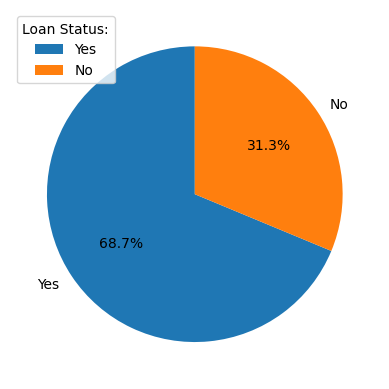

In [6]:
Loan_Yes_No = (loan_eligibility["Loan_Status"].value_counts())
mylabels = ["Yes", "No"]

plt.pie(Loan_Yes_No, labels = mylabels, startangle = 90, autopct='%1.1f%%')
plt.legend(title = "Loan Status:")
plt.show()

In [7]:
loan_eligibility

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
loan_eligibility["Loan_Status"]

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

# Clean the Loan Dataset
***

Next we need to clean the Loan Elgibility dataset which means we need to remove any duplicate data and any rows that are missing information.
We use the dropna() method to remove any rows with missing values.

In [9]:
loan_eligibility.dropna(inplace=True)

In [18]:
print(loan_eligibility.shape)
print(loan_eligibility["Loan_Status"].value_counts())

(480, 13)
Y    332
N    148
Name: Loan_Status, dtype: int64


We can see that there were some missing values as the number of rows of data is now reduced to 332 rows so 134 rows had missing values.

### Check for duplicates

I need to remove any duplicate data.
We now check for duplicate data using the drop_duplicates() method and set inplace=True so it removes in any duplicates in the current dataframe.

In [19]:
loan_eligibility.drop_duplicates(inplace=True)

In [20]:
print(loan_eligibility.shape)
print(loan_eligibility["Loan_Status"].value_counts())

(480, 13)
Y    332
N    148
Name: Loan_Status, dtype: int64


There is no duplicate data so there are no changes to the loan_eligibility dataframe. 

In [21]:
df = loan_eligibility

We now check the dataset and just use the *Loan Status* column and create a pie chart with the cleaned up data. Now we can see that 69.7% of Loan applicants were successful in their Loan application. The applicants whose Loan application was successful increased by 0.5%.

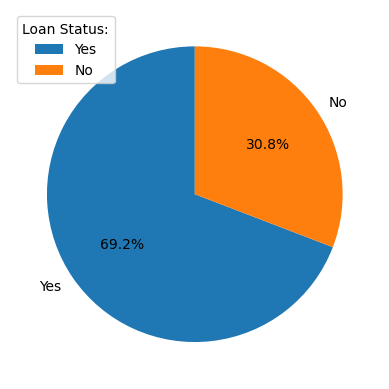

Y    332
N    148
Name: Loan_Status, dtype: int64


In [22]:
df_Loan = (loan_eligibility["Loan_Status"].value_counts())
mylabels = ["Yes", "No"]
values = [332, 148]
#mylabels = [values[0], [values[]]
plt.pie(df_Loan, labels = mylabels, startangle = 90, autopct='%1.1f%%')
# absolute_value
# '%1.1f%%'
plt.legend(title = "Loan Status:")
plt.show()
print(df_Loan)

In [23]:
df_loan = (loan_eligibility["Loan_Status"].value_counts())

In [24]:
loan_eligibility["Property_Area"]

1          Rural
2          Urban
3          Urban
4          Urban
5          Urban
         ...    
609        Rural
610        Rural
611        Urban
612        Urban
613    Semiurban
Name: Property_Area, Length: 480, dtype: object

## Univariate Analysis

We now carry out some Univariate analysis on the data to find out the relationships. The dependent variable is the Loan_Status which is either Yes the Loan application was successful or No the application was not successful. The rest of the variables are independent variables as other variables don't influence them. 

In [25]:
print(loan_eligibility.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       480.000000         480.000000  480.000000        480.000000   
mean       5364.231250        1581.093583  144.735417        342.050000   
std        5668.251251        2617.692267   80.508164         65.212401   
min         150.000000           0.000000    9.000000         36.000000   
25%        2898.750000           0.000000  100.000000        360.000000   
50%        3859.000000        1084.500000  128.000000        360.000000   
75%        5852.500000        2253.250000  170.000000        360.000000   
max       81000.000000       33837.000000  600.000000        480.000000   

       Credit_History  
count      480.000000  
mean         0.854167  
std          0.353307  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [26]:
Loan_Status_Groups = loan_eligibility.groupby('Loan_Status')

In [27]:
Loan_No = Loan_Status_Groups.get_group('N')
print(Loan_No.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       148.000000         148.000000  148.000000        148.000000   
mean       5730.189189        1773.081081  153.378378        342.810811   
std        7560.806737        3663.685217   90.339150         72.787021   
min         150.000000           0.000000    9.000000         36.000000   
25%        2863.500000           0.000000  100.000000        360.000000   
50%        3871.000000           0.000000  128.000000        360.000000   
75%        6046.250000        2356.250000  178.500000        360.000000   
max       81000.000000       33837.000000  570.000000        480.000000   

       Credit_History  
count      148.000000  
mean         0.574324  
std          0.496124  
min          0.000000  
25%          0.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [28]:
Loan_Yes = Loan_Status_Groups.get_group('Y')
print(Loan_Yes.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       332.000000         332.000000  332.000000        332.000000   
mean       5201.093373        1495.508795  140.882530        341.710843   
std        4584.815491        1982.742932   75.544237         61.651497   
min         645.000000           0.000000   17.000000         60.000000   
25%        2912.750000           0.000000  100.000000        360.000000   
50%        3858.500000        1211.500000  128.000000        360.000000   
75%        5818.250000        2250.000000  162.000000        360.000000   
max       39999.000000       20000.000000  600.000000        480.000000   

       Credit_History  
count      332.000000  
mean         0.978916  
std          0.143882  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


## Histograms 

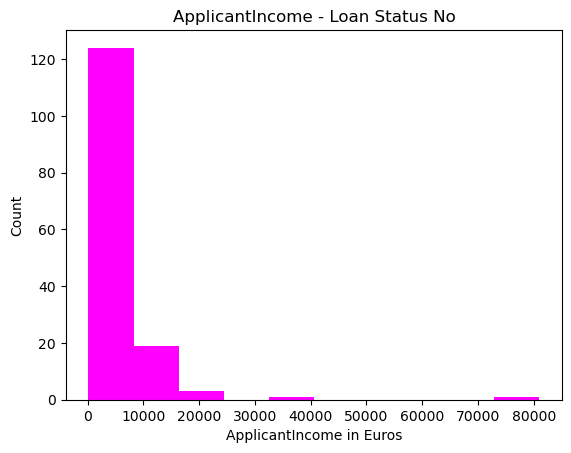

In [29]:
Status_No_ApplicantIncome = Loan_No["ApplicantIncome"]
  
plt.hist(Status_No_ApplicantIncome, bins = 10, color = "magenta")
plt.title("ApplicantIncome - Loan Status No")
plt.xlabel("ApplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

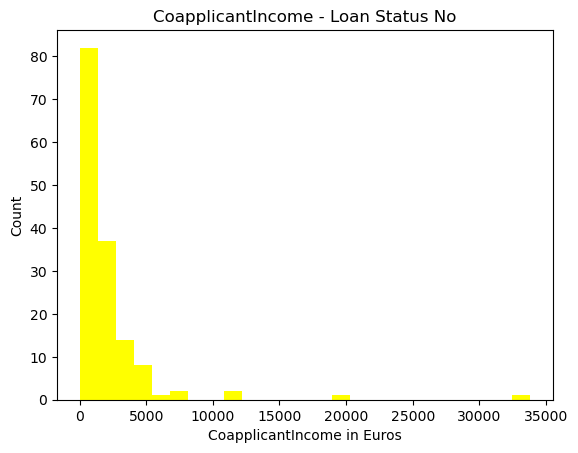

In [30]:
Status_No_CoapplicantIncome = Loan_No["CoapplicantIncome"]
  
plt.hist(Status_No_CoapplicantIncome, bins = 25, color = "yellow")
plt.title("CoapplicantIncome - Loan Status No")
plt.xlabel("CoapplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

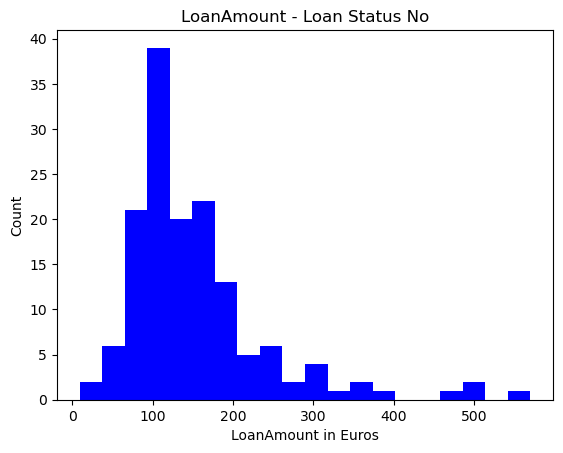

In [31]:
Status_No_LoanAmount = Loan_No["LoanAmount"]
  
plt.hist(Status_No_LoanAmount, bins = 20, color = "blue")
plt.title("LoanAmount - Loan Status No")
plt.xlabel("LoanAmount in Euros")
plt.ylabel("Count")
plt.show()

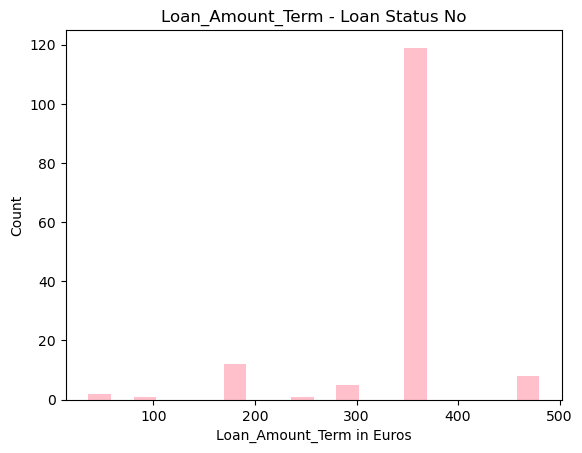

In [32]:
Status_No_Loan_Amount_Term = Loan_No["Loan_Amount_Term"]
  
plt.hist(Status_No_Loan_Amount_Term, bins = 20, color = "pink")
plt.title("Loan_Amount_Term - Loan Status No")
plt.xlabel("Loan_Amount_Term in Euros")
plt.ylabel("Count")
plt.show()

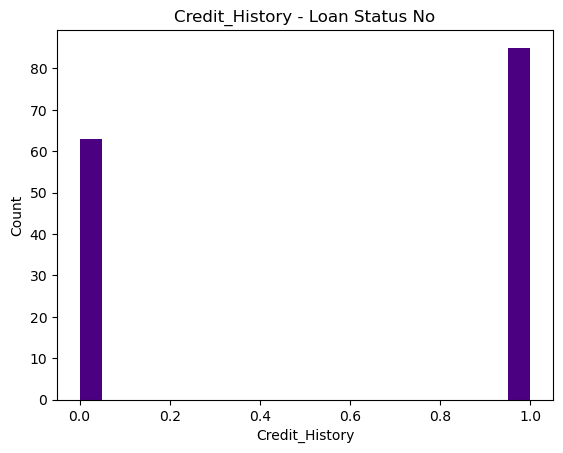

In [33]:
Status_No_Credit_History = Loan_No["Credit_History"]
  
plt.hist(Status_No_Credit_History, bins = 20, color = "indigo")
plt.title("Credit_History - Loan Status No")
plt.xlabel("Credit_History")
plt.ylabel("Count")
plt.show()

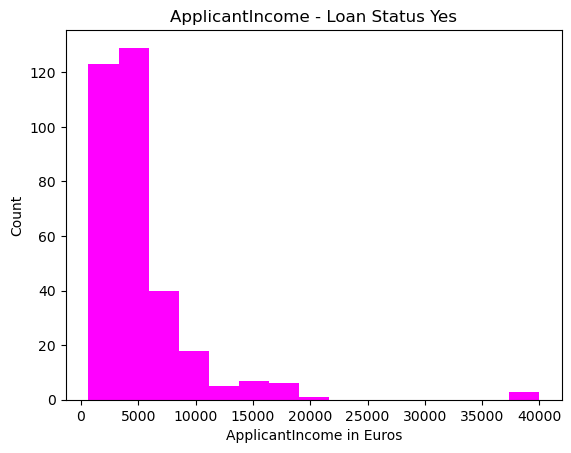

In [34]:
Status_Yes_ApplicantIncome = Loan_Yes["ApplicantIncome"]
  
plt.hist(Status_Yes_ApplicantIncome, bins = 15, color = "magenta")
plt.title("ApplicantIncome - Loan Status Yes")
plt.xlabel("ApplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

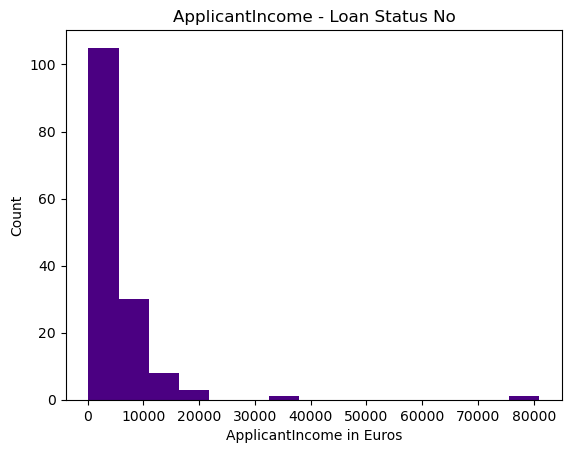

In [35]:
Status_Yes_ApplicantIncome = Loan_No["ApplicantIncome"]
  
plt.hist(Status_Yes_ApplicantIncome, bins = 15, color = "indigo")
plt.title("ApplicantIncome - Loan Status No")
plt.xlabel("ApplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

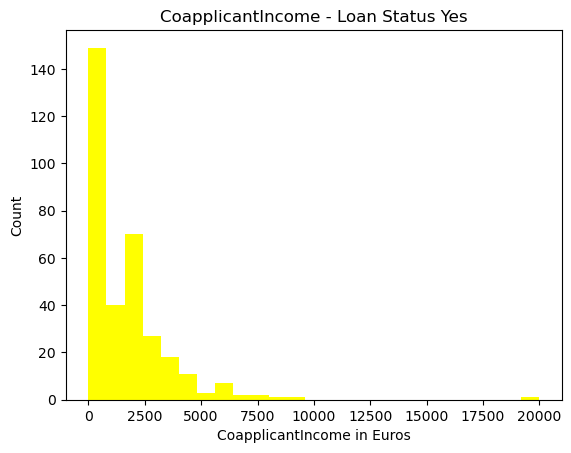

In [36]:
Status_Yes_CoapplicantIncome = Loan_Yes["CoapplicantIncome"]
  
plt.hist(Status_Yes_CoapplicantIncome, bins = 25, color = "yellow")
plt.title("CoapplicantIncome - Loan Status Yes")
plt.xlabel("CoapplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

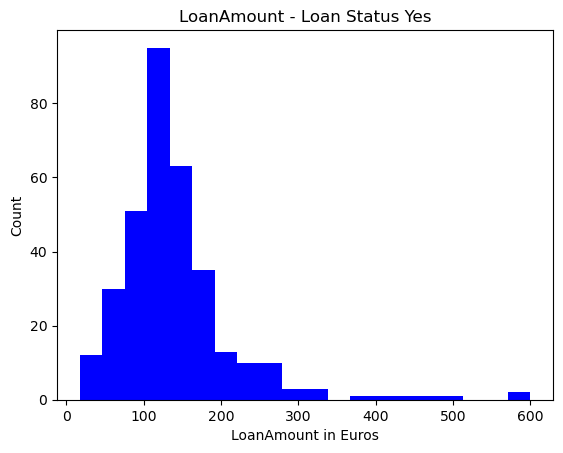

In [37]:
Status_Yes_LoanAmount = Loan_Yes["LoanAmount"]
  
plt.hist(Status_Yes_LoanAmount, bins = 20, color = "blue")
plt.title("LoanAmount - Loan Status Yes")
plt.xlabel("LoanAmount in Euros")
plt.ylabel("Count")
plt.show()

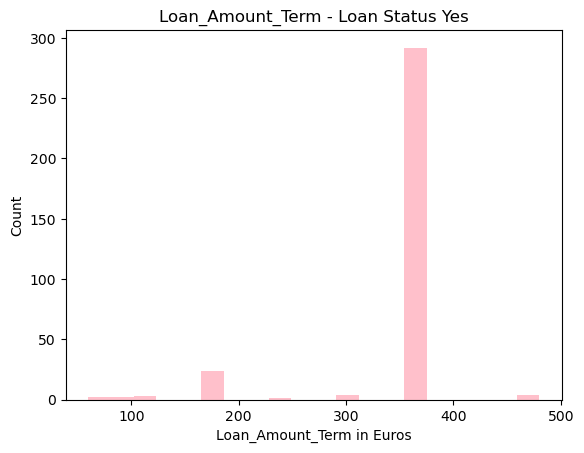

In [38]:
Status_Yes_Loan_Amount_Term = Loan_Yes["Loan_Amount_Term"]
  
plt.hist(Status_Yes_Loan_Amount_Term, bins = 20, color = "pink")
plt.title("Loan_Amount_Term - Loan Status Yes")
plt.xlabel("Loan_Amount_Term in Euros")
plt.ylabel("Count")
plt.show()

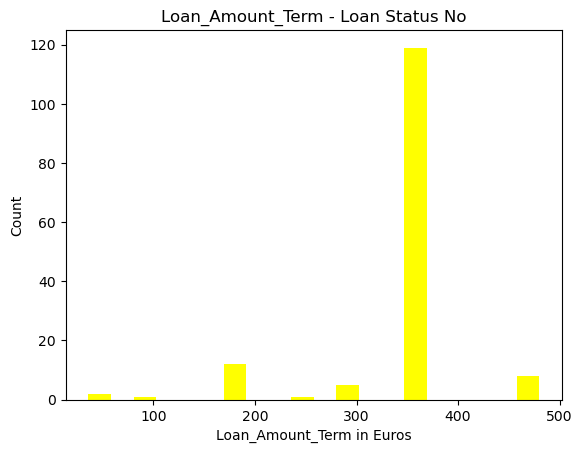

In [39]:
Status_Yes_Loan_Amount_Term = Loan_No["Loan_Amount_Term"]
  
plt.hist(Status_Yes_Loan_Amount_Term, bins = 20, color = "yellow")
plt.title("Loan_Amount_Term - Loan Status No")
plt.xlabel("Loan_Amount_Term in Euros")
plt.ylabel("Count")
plt.show()

## Univariate Analysis on Categorical Data

To carry out the Univariate analysis on Categorical Data a Bar Chart is used. First we look at Credit History.

Text(0, 0.5, 'Count')

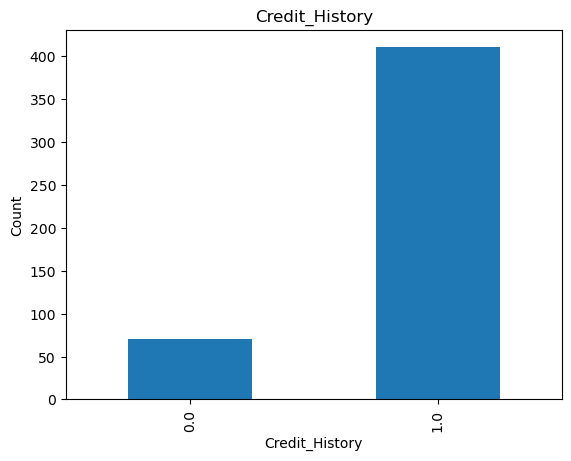

In [47]:
loan_eligibility.groupby('Credit_History').size().plot(kind='bar')
plt.title("Credit_History")
plt.xlabel("Credit_History")
plt.ylabel("Count")

This shows us that about 400 Loan Appplicants have good Credit History while 80 Loan Applicants have poor Credit History.

Text(0, 0.5, 'Count')

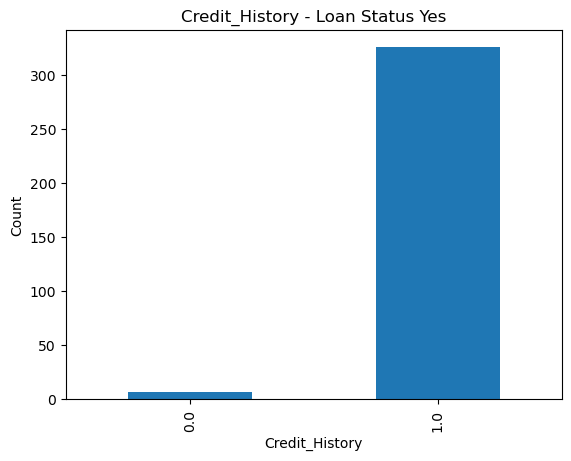

In [50]:
loan_eligibility.groupby(Loan_Yes["Credit_History"]).size().plot(kind='bar')
plt.title("Credit_History - Loan Status Yes")
plt.xlabel("Credit_History")
plt.ylabel("Count")
#Status_Yes_Credit_History = Loan_Yes["Credit_History"]

The above Bar plot is for Applicants whose loan was successful. There are around 325 applicants which have Good Credit history and got a Loan and interestingly a number of applicants received a loan woth Poor Credit History.

Text(0, 0.5, 'Count')

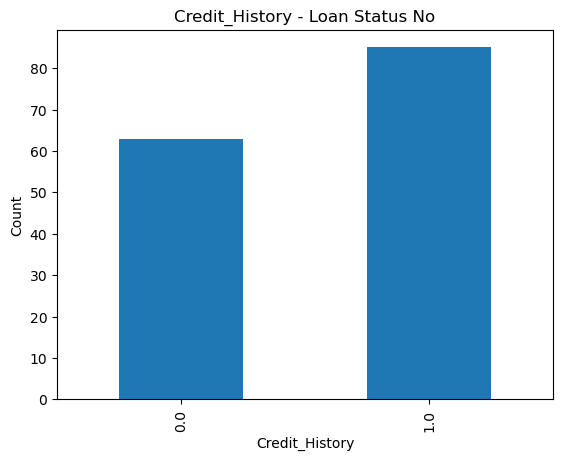

In [49]:
loan_eligibility.groupby(Loan_No["Credit_History"]).size().plot(kind='bar')
plt.title("Credit_History - Loan Status No")
plt.xlabel("Credit_History")
plt.ylabel("Count")

The above plot shows the applicants that weren't successful and we can see that over 80 had good credit history but didn't get a loan so there must be another reason why they didn't. It also shows that there is at least another variable that determines whether an applicant is successful in geeting a loan or not successful. So, from this data Credit History is a good variable to determine whether or not an applicant gets a loan.

Text(0, 0.5, 'Count')

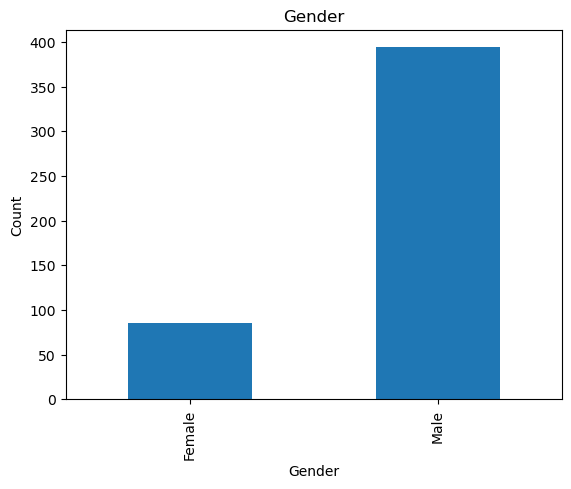

In [52]:
loan_eligibility.groupby('Gender').size().plot(kind='bar')
plt.title("Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

The Gender Bar chart shows that around 80% of applicants are Male, this is from the data we have. 

Text(0, 0.5, 'Count')

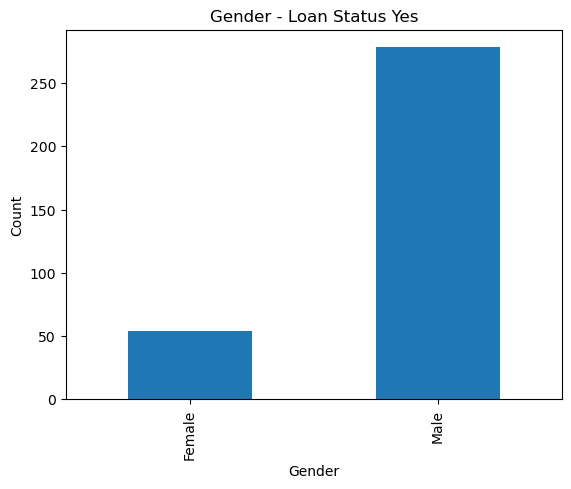

In [53]:
loan_eligibility.groupby(Loan_Yes["Gender"]).size().plot(kind='bar')
plt.title("Gender - Loan Status Yes")
plt.xlabel("Gender")
plt.ylabel("Count")

The Bar plot shows that over 250 Males get a loan whereas 50 Females get a loan. This doesn't tell us much and doesn't apppear to be a strong candidate to determine whether or not you have a better chance of getting a loan depending on your Gender. 

Text(0, 0.5, 'Count')

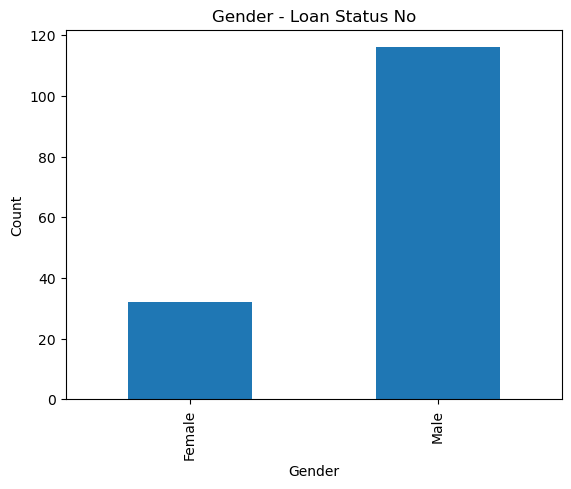

In [68]:
loan_eligibility.groupby(Loan_No["Gender"]).size().plot(kind='bar')
plt.title("Gender - Loan Status No")
plt.xlabel("Gender")
plt.ylabel("Count")

Again its not clear from the Bar plot if the loan Status is determined by Gender.

Text(0, 0.5, 'Count')

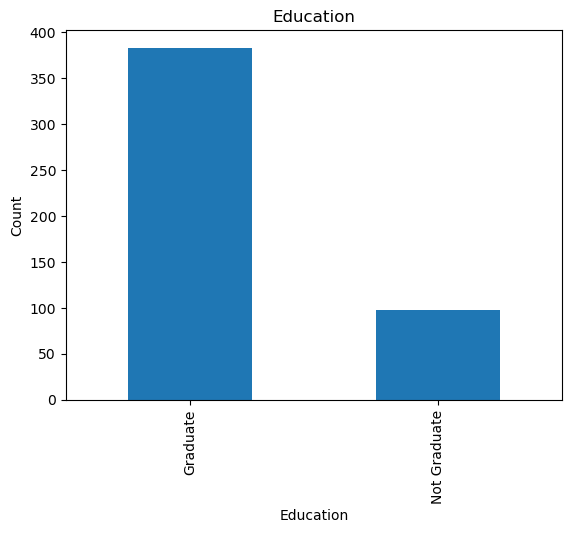

In [55]:
loan_eligibility.groupby('Education').size().plot(kind='bar')
plt.title("Education")
plt.xlabel("Education")
plt.ylabel("Count")

The Bar plot shows that nearly 80% of applicants are Graduates.

Text(0, 0.5, 'Count')

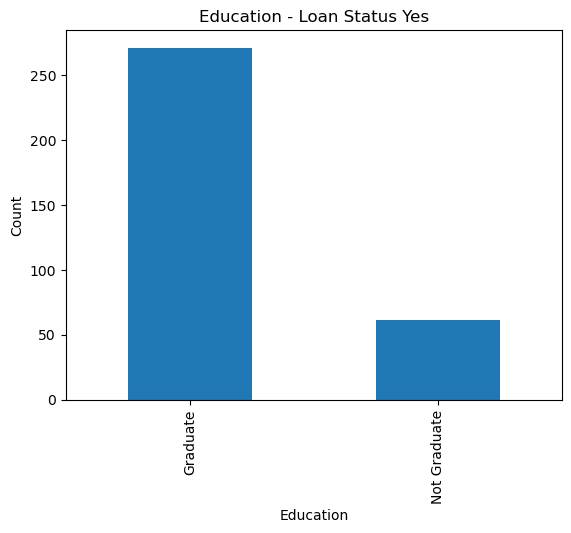

In [69]:
loan_eligibility.groupby(Loan_Yes["Education"]).size().plot(kind='bar')
plt.title("Education - Loan Status Yes")
plt.xlabel("Education")
plt.ylabel("Count")

Its not clear whether being a Graduate is an advantage when you seek a loan.

Text(0, 0.5, 'Count')

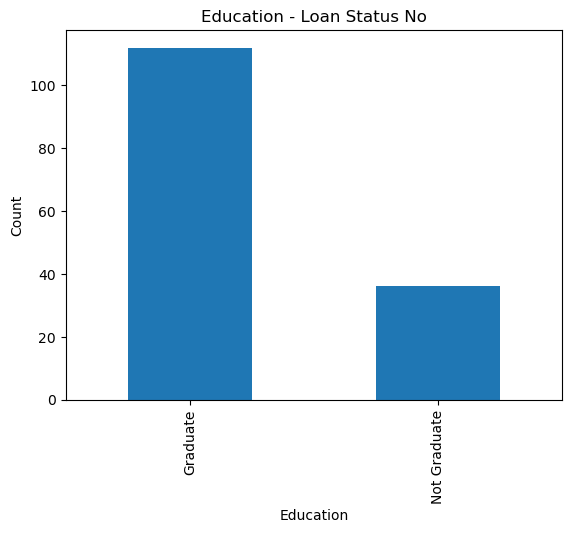

In [70]:
loan_eligibility.groupby(Loan_No["Education"]).size().plot(kind='bar')
plt.title("Education - Loan Status No")
plt.xlabel("Education")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

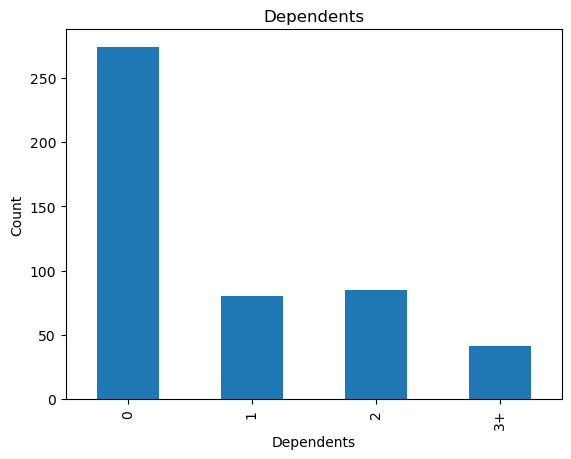

In [56]:
loan_eligibility.groupby('Dependents').size().plot(kind='bar')
plt.title("Dependents")
plt.xlabel("Dependents")
plt.ylabel("Count")

More applicants have zero dependents which is more than the 1, 2 & 3+ dependents added together. 

Text(0, 0.5, 'Count')

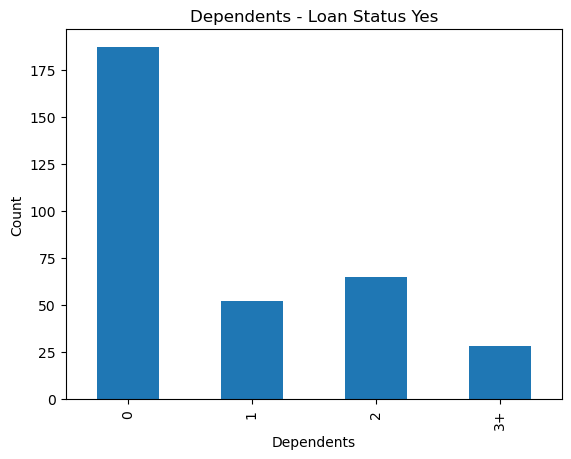

In [71]:
loan_eligibility.groupby(Loan_Yes["Dependents"]).size().plot(kind='bar')
plt.title("Dependents - Loan Status Yes")
plt.xlabel("Dependents")
plt.ylabel("Count")

Again its hard  to guage if having zero dependents is an advantage when seeking a loan. Interestingly it appears that having 2 dependents may give you a better chance of getting a loan.

Text(0, 0.5, 'Count')

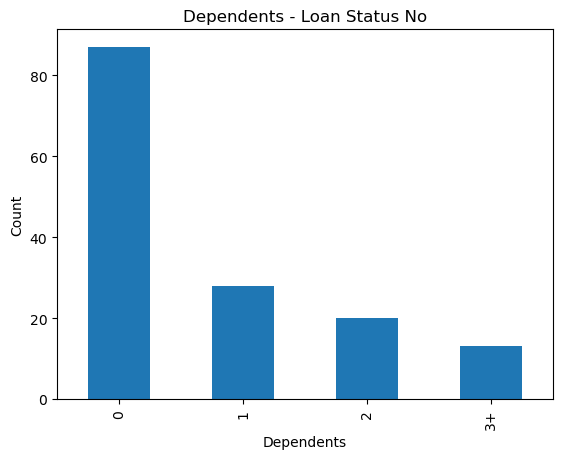

In [67]:
loan_eligibility.groupby(Loan_No["Dependents"]).size().plot(kind='bar')
plt.title("Dependents - Loan Status No")
plt.xlabel("Dependents")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

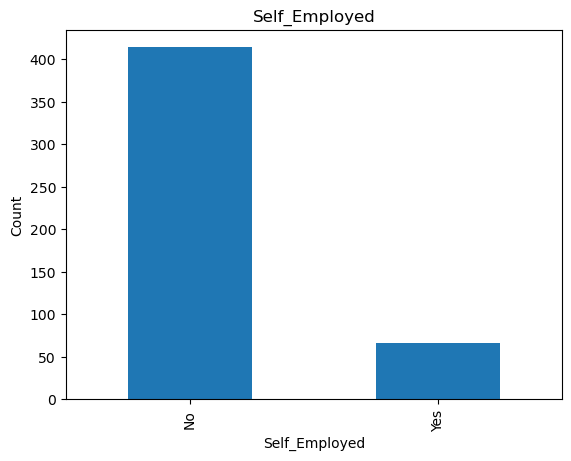

In [57]:
loan_eligibility.groupby('Self_Employed').size().plot(kind='bar')
plt.title("Self_Employed")
plt.xlabel("Self_Employed")
plt.ylabel("Count")

The Self Employed Bar plot shows us that the majority of applicants are employees while around 18% are Self Employed

Text(0, 0.5, 'Count')

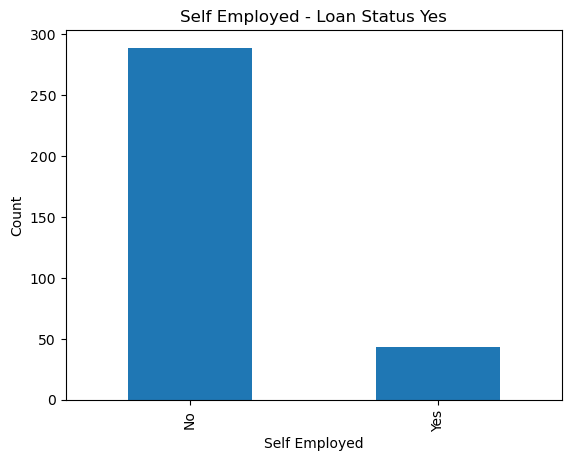

In [61]:
loan_eligibility.groupby(Loan_Yes["Self_Employed"]).size().plot(kind='bar')
plt.title("Self Employed - Loan Status Yes")
plt.xlabel("Self Employed")
plt.ylabel("Count")

Its hard to tell from the Bar plot whether being Self Employed is an advantage or not. We will need to dig deeper to find out if thats the case.

Text(0, 0.5, 'Count')

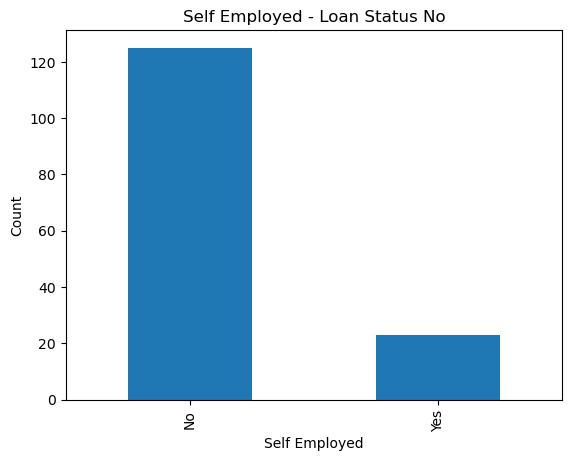

In [72]:
loan_eligibility.groupby(Loan_No["Self_Employed"]).size().plot(kind='bar')
plt.title("Self Employed - Loan Status No")
plt.xlabel("Self Employed")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

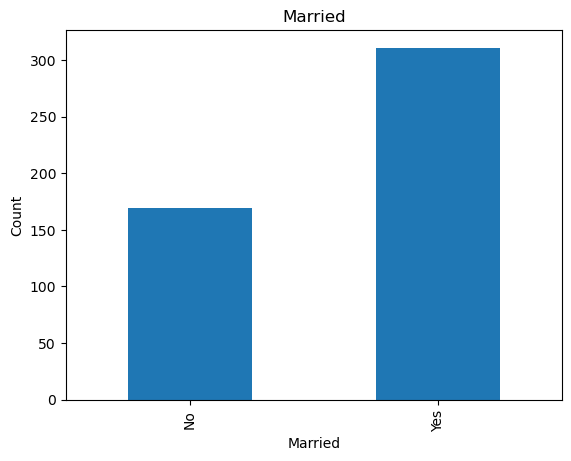

In [63]:
loan_eligibility.groupby('Married').size().plot(kind='bar')
plt.title("Married")
plt.xlabel("Married")
plt.ylabel("Count")

The plot shows that around 66% of Loan applicants are Married.

In [112]:
#loan_eligibility.groupby(Loan_Yes["Married"]).size().plot(kind='bar')
#plt.title("Married - Loan Status Yes")
#plt.xlabel("Married")
#plt.ylabel("Count")

#Married_Groups = loan_eligibility[['Married']].copy
#class_23 = titanic[(titanic["Pclass"] == 2)
                   
#Married_Yes = loan_eligibility.[(Married["Yes"])]
#Y = Married_Groups.loc[(Married_Groups.Married == "Yes")]
#Y = Married_Yes[['Married']].copy
#Married_No = Married_Groups.get_group('No')
#x = ['Yes','No']

#Married_Groups = loan_eligibility.groupby('Married')
#Married_No = Married_Groups.get_group('No')
#Married_Yes = Married_Groups.get_group('Yes')
#y1 = Married_Groups.loc[(Married_Groups.Married == "Yes")]
#y2 = Married_Groups.loc[(Married_Groups.Married == "No")]

#print(Married_No)
#plt.bar(x, y1, color='r')
#plt.bar(x, y2, bottom=y1, color='b')
#plt.show()

Text(0, 0.5, 'Count')

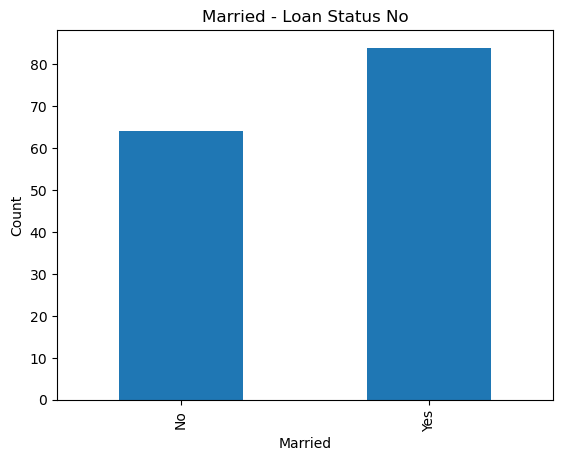

In [113]:
loan_eligibility.groupby(Loan_No["Married"]).size().plot(kind='bar')
plt.title("Married - Loan Status No")
plt.xlabel("Married")
plt.ylabel("Count")

In [114]:
loan_eligibility

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,1


In [115]:
#sns.pairplot(loan_eligibility,hue="Loan_Status", palette="husl", markers=["o", "s"])
#plt.show()

In [116]:
#sns.pairplot(loan_eligibility)

In [117]:
#sns.pairplot(loan_eligibility, hue='Loan_Status')

# Correlation Coefficient

In [118]:
print(loan_eligibility.corr(method='pearson'))

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.112588    0.495310   
CoapplicantIncome        -0.112588           1.000000    0.190740   
LoanAmount                0.495310           0.190740    1.000000   
Loan_Amount_Term         -0.010838          -0.005775    0.050867   
Credit_History           -0.056152          -0.008692   -0.040773   
Loan_Status              -0.043152          -0.049020   -0.071753   

                   Loan_Amount_Term  Credit_History  Loan_Status  
ApplicantIncome           -0.010838       -0.056152    -0.043152  
CoapplicantIncome         -0.005775       -0.008692    -0.049020  
LoanAmount                 0.050867       -0.040773    -0.071753  
Loan_Amount_Term           1.000000        0.032937    -0.007798  
Credit_History             0.032937        1.000000     0.529390  
Loan_Status               -0.007798        0.529390     1.000000  


In [119]:
print(Loan_No.corr(method='pearson'))

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.078016    0.511014   
CoapplicantIncome        -0.078016           1.000000    0.227973   
LoanAmount                0.511014           0.227973    1.000000   
Loan_Amount_Term          0.055122          -0.039227    0.076849   
Credit_History           -0.007766           0.044403    0.063723   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome            0.055122       -0.007766  
CoapplicantIncome         -0.039227        0.044403  
LoanAmount                 0.076849        0.063723  
Loan_Amount_Term           1.000000        0.033359  
Credit_History             0.033359        1.000000  


In [120]:
print(Loan_Yes.corr(method='pearson'))

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.165357    0.490933   
CoapplicantIncome        -0.165357           1.000000    0.157486   
LoanAmount                0.490933           0.157486    1.000000   
Loan_Amount_Term         -0.068809           0.025562    0.033881   
Credit_History           -0.126719          -0.044673   -0.127251   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.068809       -0.126719  
CoapplicantIncome          0.025562       -0.044673  
LoanAmount                 0.033881       -0.127251  
Loan_Amount_Term           1.000000        0.079007  
Credit_History             0.079007        1.000000  


## Encode the Categorical varibles

We need to encode the Categorical variables that don't have numerical values. 

In [124]:
loan_eligibility

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [173]:
#Loan Status Encoding
loan_eligibility['Loan_Status'] = loan_eligibility.Loan_Status.map({'Y': 1, 'N': 0}).astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

There are a number of Categorical variables - Gender, Married, Dependents, Self Employed, Education,Property Area and 

In [174]:
# Gender Male = 0, Female = 1
loan_eligibility['Loan_Status'] = loan_eligibility.Loan_Status.map({'Y': 1, 'N': 0}).astype(int)

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [175]:
#Gender Encoding
loan_eligibility= loan_eligibility.replace({"Gender":{"Male":1, "Female":0 }})

#Married Encoding
loan_eligibility =loan_eligibility.replace({"Married" :{"Yes":1, "No":0}})

#Replace the 3+ in dependents ande make the column numeric
loan_eligibility['Dependents'] = loan_eligibility['Dependents'].replace('3+', '3')
loan_eligibility['Dependents']=pd.to_numeric(loan_eligibility['Dependents'], errors='coerce')

#Count the quantity of values on the column
loan_eligibility['Self_Employed'].value_counts()
loan_eligibility= loan_eligibility.replace({"Self_Employed":{"Yes":1, "No":0 }})

#Education Encoding
loan_eligibility['Education'].value_counts()
loan_eligibility= loan_eligibility.replace({"Education":{"Graduate":1, "Not Graduate":0 }})

#Drop the Loan ID column
loan_eligibility = loan_eligibility.drop(columns=['Loan_ID'])

#Property Area Encoding
loan_eligibility['Property_Area'].value_counts()
loan_eligibility['Property_Area'] = loan_eligibility['Property_Area'].map({'Rural': 0, 'Urban': 1, 'Semiurban': 2})


KeyError: "['Loan_ID'] not found in axis"

#### Summary
* Gender - Male = 1, Female = 0
* Self Employed - Yes = 1, No = 0
* Education - Graduate = 1, Not Graduate = 0
* Property Area - Rural = 0, Urban = 1 and Semiurban = 2

In [176]:
loan_eligibility.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
6,1,1,0,0,0,2333,1516.0,95.0,360.0,1.0,1,1
7,1,1,3,1,0,3036,2504.0,158.0,360.0,0.0,2,0
8,1,1,2,1,0,4006,1526.0,168.0,360.0,1.0,1,1
9,1,1,1,1,0,12841,10968.0,349.0,360.0,1.0,2,0
10,1,1,2,1,0,3200,700.0,70.0,360.0,1.0,1,1


The heat map shows 

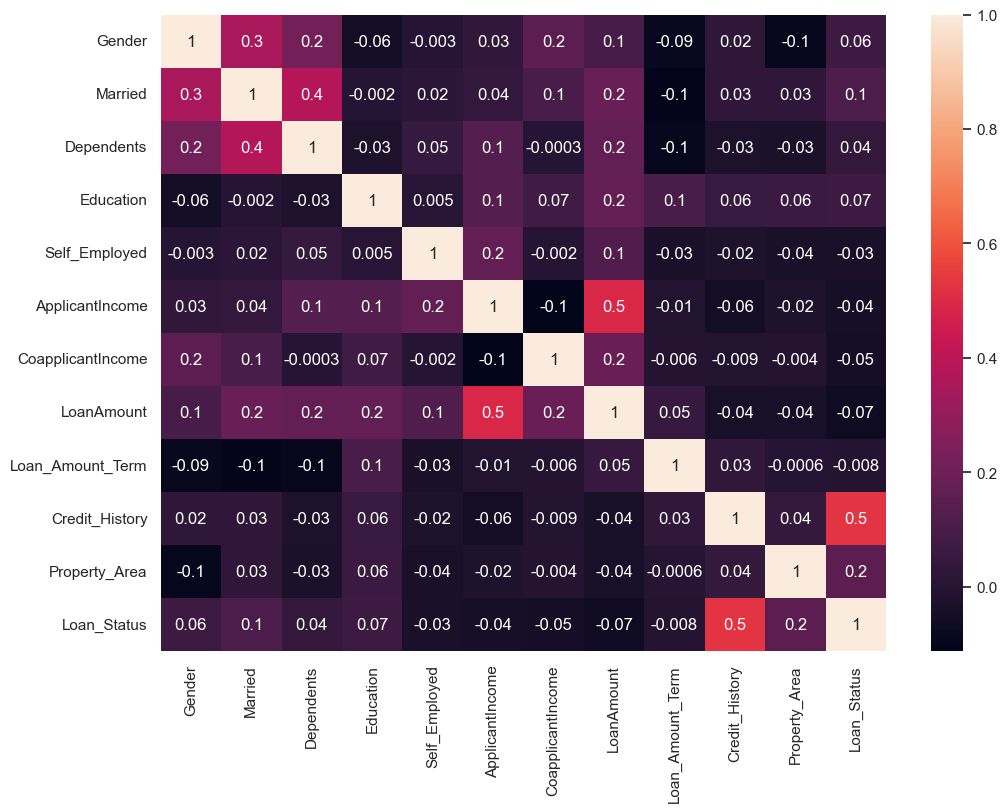

In [177]:
sns.heatmap(loan_eligibility.corr(),annot=True,fmt='.1g')
#sns.heatmap(loan_eligibility.corr(),annot=True,fmt='.5g',vmax=300)
plt.show()

You can see from the heatmap it shows the correlation values. We're intesested in the Loan_Status and teh relation ship it has with the the other variables. You can see that Credit History seems to have teh strongest relationship with Loan_Status which has a correlation value of 0.5. Interestingly the Property Area has a correlation value of 0.2. What I am surprised with is that the ApplicantIncome doesn't have a relationship with Loan_Status.

#### Gender 0.06, Married 0.1, Education 0.07, Loan Amount Term .008, Credit History 0.5 and Property Area 0.2

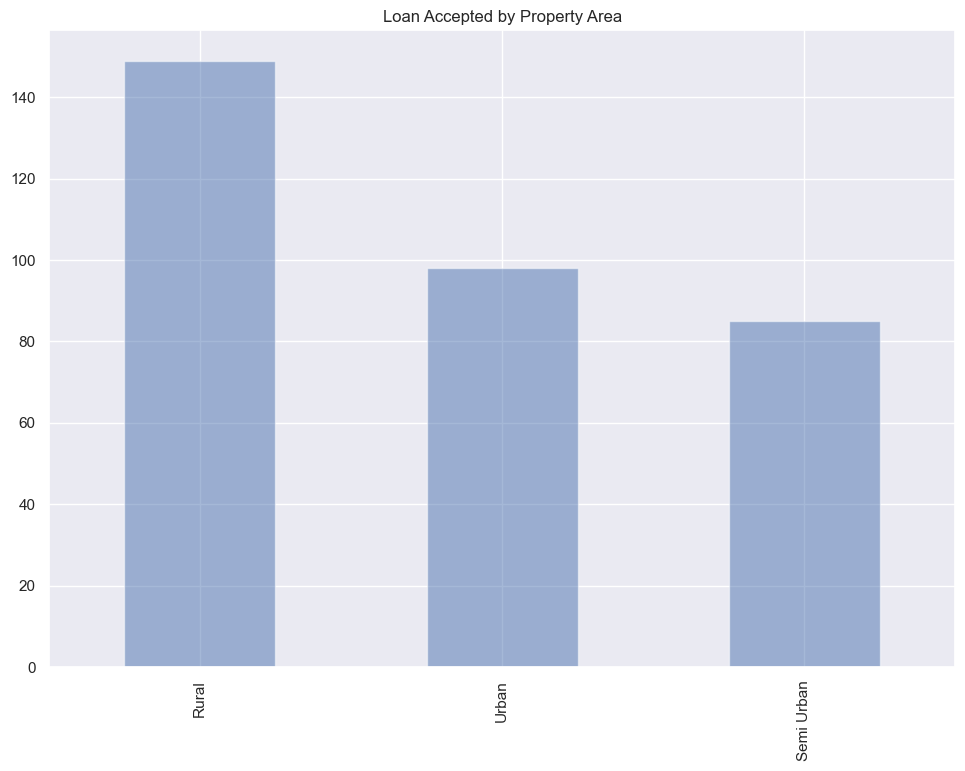

In [178]:
loan_eligibility.Property_Area[loan_eligibility.Loan_Status==1].value_counts(normalize = False).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted by Property Area')
property=['Rural','Urban','Semi Urban']
pos = np.arange(len(property))
plt.xticks(pos, property)
plt.show()

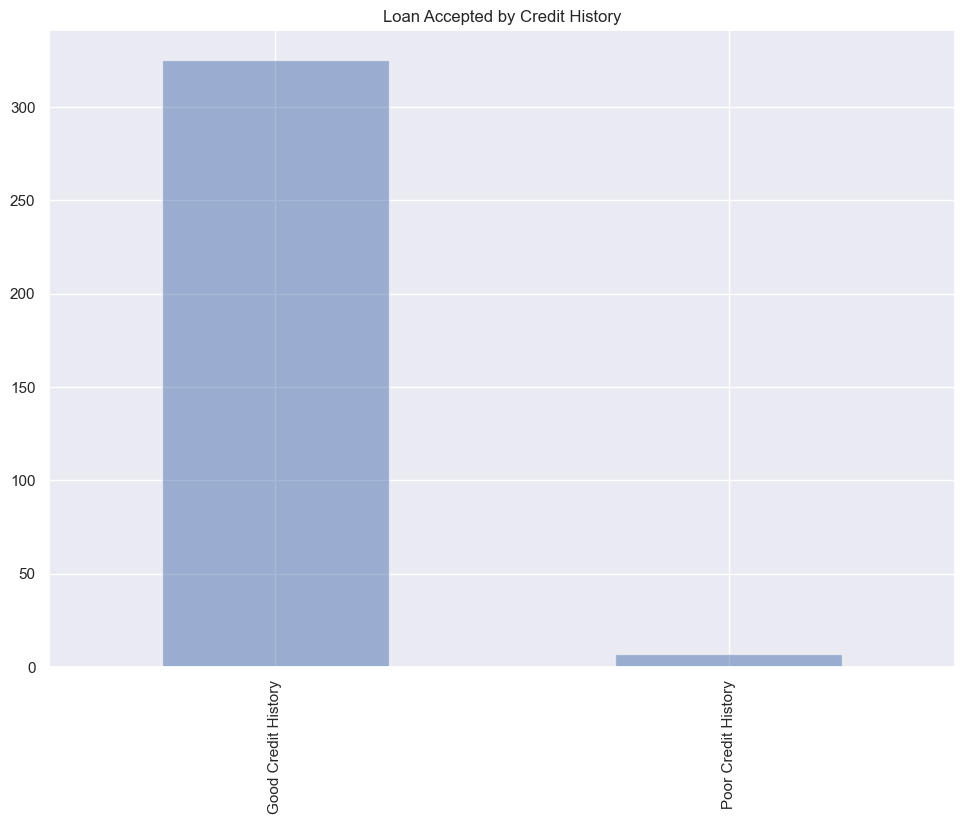

In [179]:
loan_eligibility.Credit_History[loan_eligibility.Loan_Status==1].value_counts(normalize = False).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted by Credit History')
credit=['Good Credit History','Poor Credit History']
pos = np.arange(len(credit))
plt.xticks(pos, credit)
plt.show()

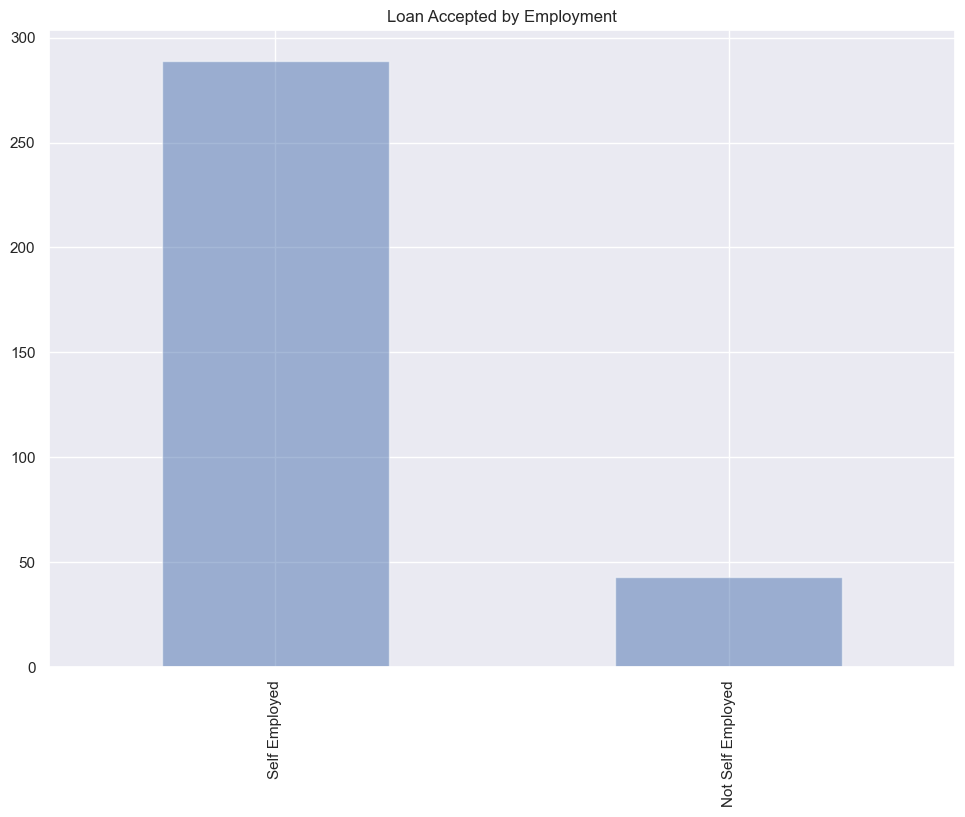

In [180]:
loan_eligibility.Self_Employed[loan_eligibility.Loan_Status==1].value_counts(normalize = False).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted by Employment')
employment=['Self Employed','Not Self Employed']
pos = np.arange(len(employment))
plt.xticks(pos, employment)
plt.show()

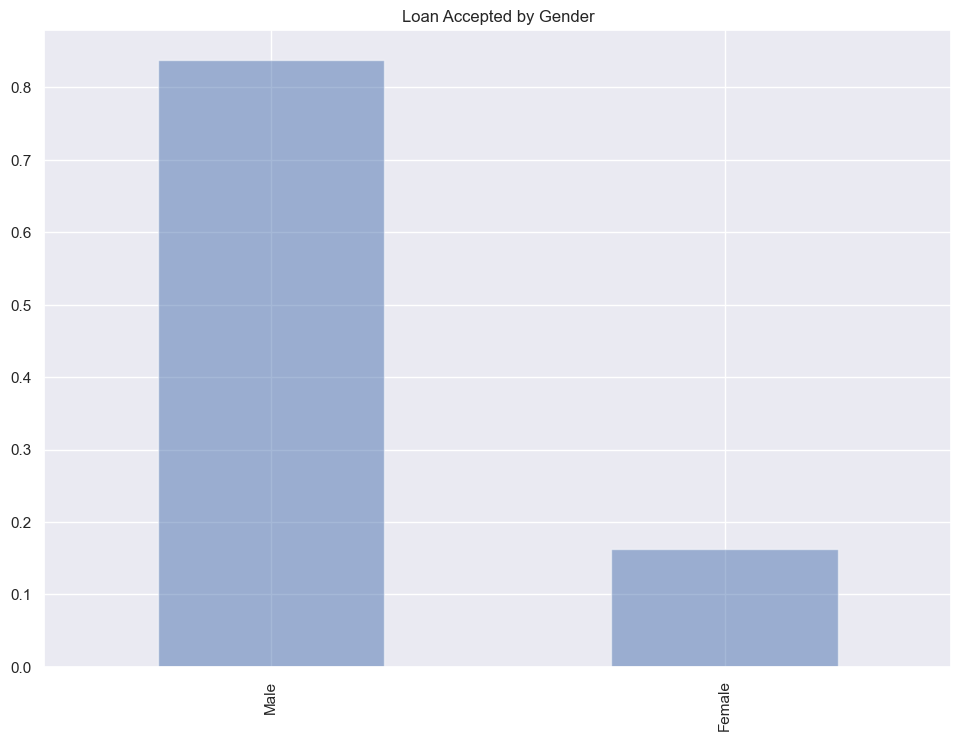

In [181]:
#loan_eligibility.Gender[loan_eligibility.Loan_Status==0].value_counts(normalize = False).plot(kind='bar', alpha = 0.5)
loan_eligibility.Gender[loan_eligibility.Loan_Status==1].value_counts(normalize = True).plot(kind='bar', alpha = 0.5)
plt.title('Loan Accepted by Gender')
gender=['Male','Female']
pos = np.arange(len(gender))
plt.xticks(pos, gender)
plt.show()

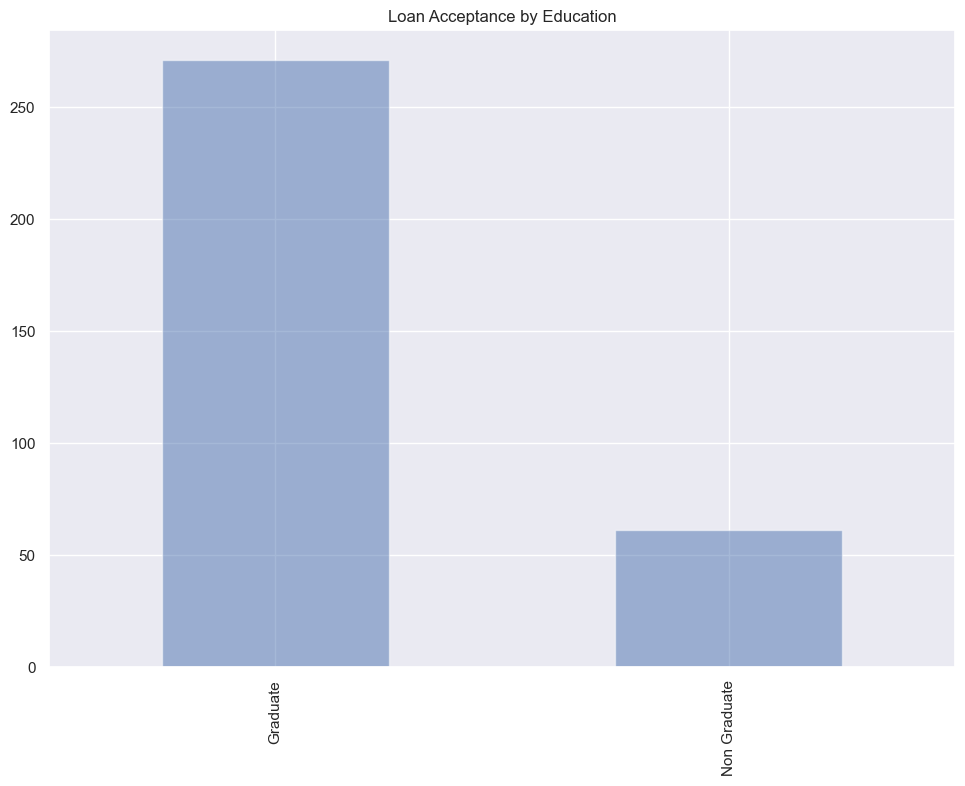

In [182]:
loan_eligibility.Education[loan_eligibility.Loan_Status==1].value_counts(normalize = False).plot(kind='bar', alpha = 0.5)
plt.title('Loan Acceptance by Education')
graduate=['Graduate','Non Graduate']
pos = np.arange(len(graduate))
plt.xticks(pos, graduate)
plt.show()

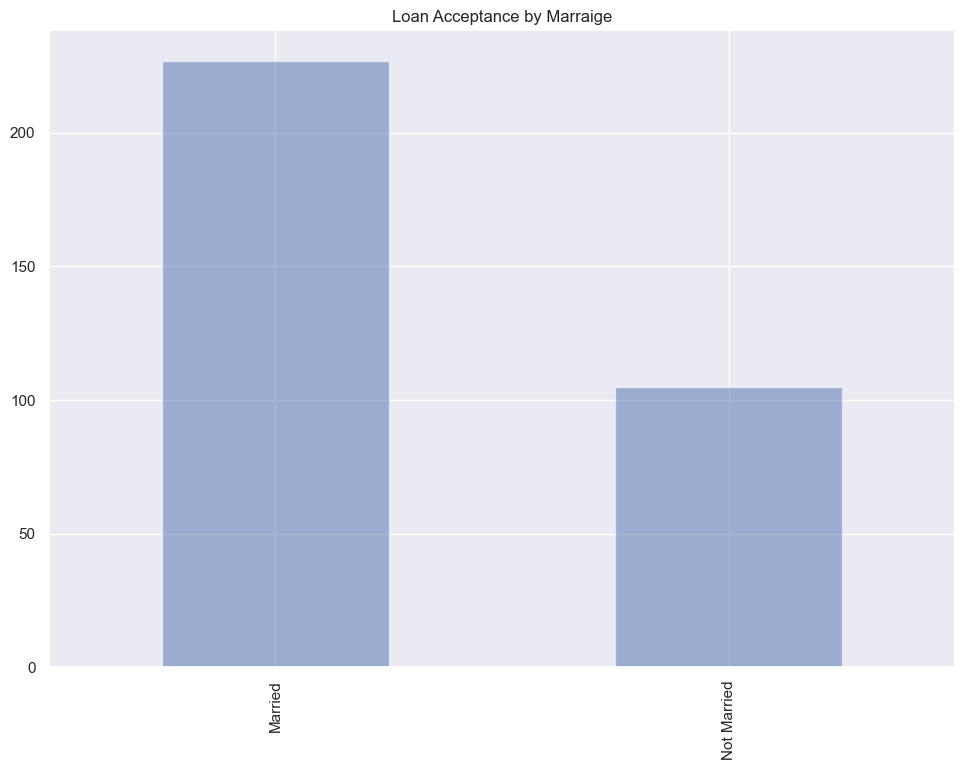

In [183]:
loan_eligibility.Married[loan_eligibility.Loan_Status==1].value_counts(normalize = False).plot(kind='bar', alpha = 0.5)
plt.title('Loan Acceptance by Marraige')
married=['Married','Not Married']
pos = np.arange(len(married))
plt.xticks(pos, married)
plt.show()

In [184]:
sum(loan_eligibility.Gender[loan_eligibility.Loan_Status==1])

278

In [185]:
sum(loan_eligibility.Gender[loan_eligibility.Loan_Status==0]) + sum(loan_eligibility.Gender[loan_eligibility.Loan_Status==1])

394

In [186]:
loan_eligibility

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


In [187]:
loan_eligibility["Gender"].value_counts()

1    394
0     86
Name: Gender, dtype: int64

In [188]:
loan_eligibility["Education"].value_counts()

1    383
0     97
Name: Education, dtype: int64

In [189]:
(loan_eligibility.Gender[loan_eligibility.Loan_Status==1])

2      1
3      1
4      1
5      1
6      1
      ..
608    1
609    0
610    1
611    1
612    1
Name: Gender, Length: 332, dtype: int64

In [190]:
print(loan_eligibility.shape)
print(loan_eligibility.Gender[loan_eligibility.Loan_Status==0])

(480, 12)
1      1
7      1
9      1
13     1
17     0
      ..
585    1
589    1
591    1
596    1
613    0
Name: Gender, Length: 148, dtype: int64


In [191]:
loan_eligibility["Self_Employed"].value_counts()

0    414
1     66
Name: Self_Employed, dtype: int64

In [192]:
loan_eligibility["Education"].value_counts()

1    383
0     97
Name: Education, dtype: int64

In [193]:
loan_eligibility["Married"].value_counts()

1    311
0    169
Name: Married, dtype: int64

In [194]:
(loan_eligibility.Married[loan_eligibility.Loan_Status==0].value_counts())

1    84
0    64
Name: Married, dtype: int64

In [195]:
(loan_eligibility.Married[loan_eligibility.Loan_Status==1].value_counts())

1    227
0    105
Name: Married, dtype: int64

In [196]:
a = loan_eligibility.Married[loan_eligibility.Loan_Status==0]
b = loan_eligibility.Married[loan_eligibility.Loan_Status==1]

In [197]:
print(a)

1      1
7      1
9      1
13     0
17     0
      ..
585    1
589    1
591    1
596    1
613    0
Name: Married, Length: 148, dtype: int64


In [198]:
print(b)

2      1
3      1
4      0
5      1
6      1
      ..
608    1
609    0
610    1
611    1
612    1
Name: Married, Length: 332, dtype: int64


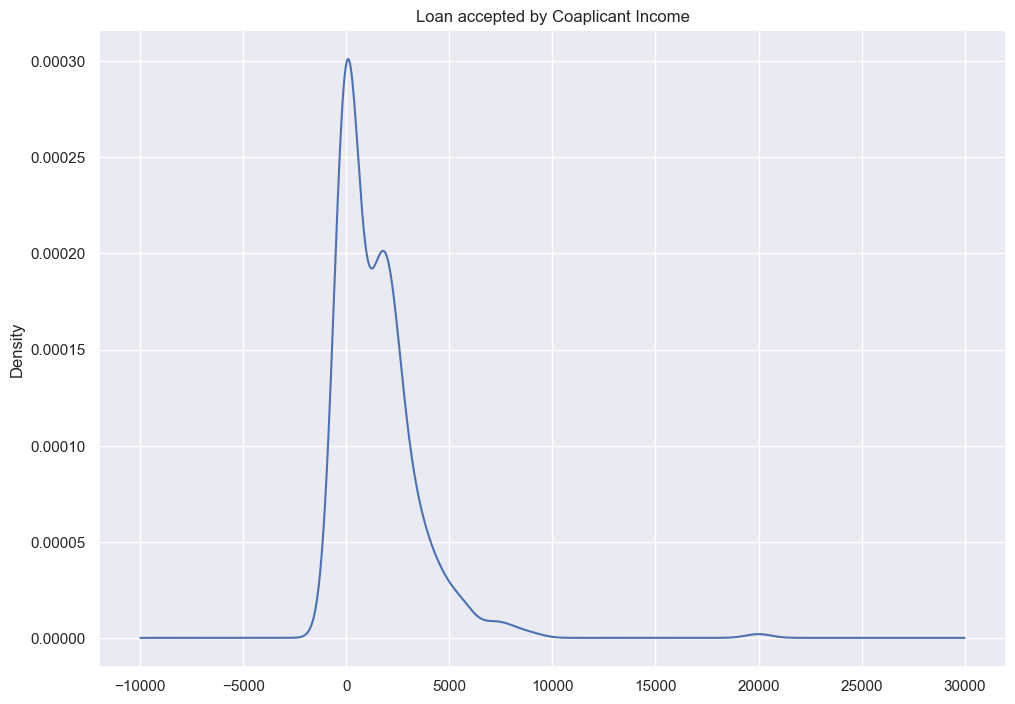

In [199]:
loan_eligibility.CoapplicantIncome[loan_eligibility.Loan_Status==1].plot(kind='kde')
plt.title('Loan accepted by Coaplicant Income')
plt.show()

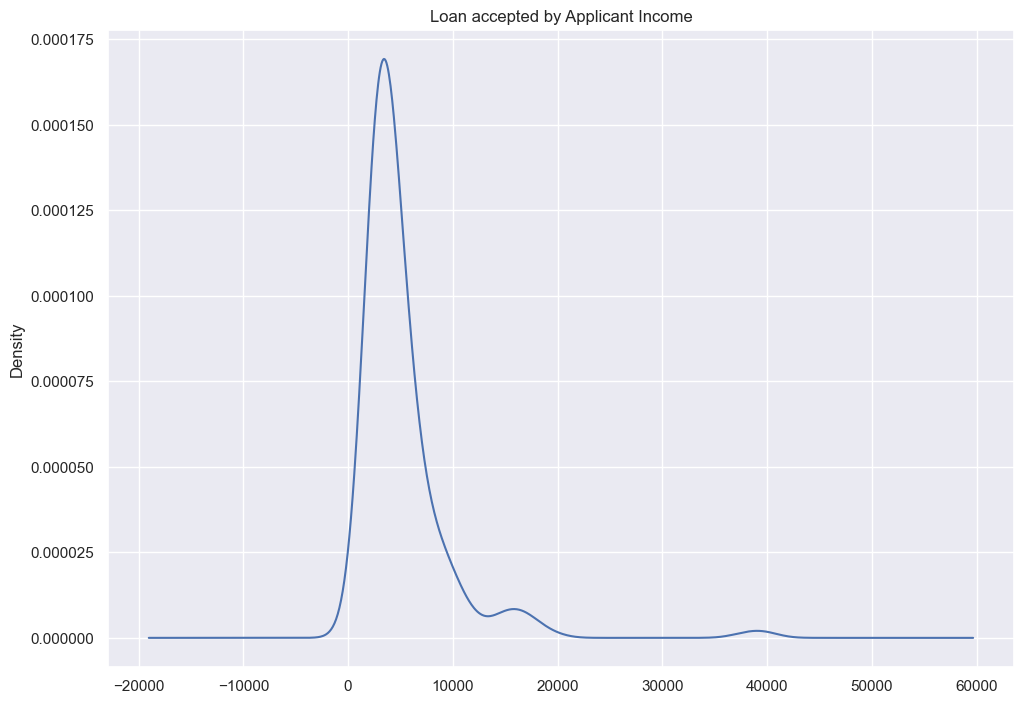

In [200]:
loan_eligibility.ApplicantIncome[loan_eligibility.Loan_Status==1].plot(kind='kde')
plt.title('Loan accepted by Applicant Income')
plt.show()

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

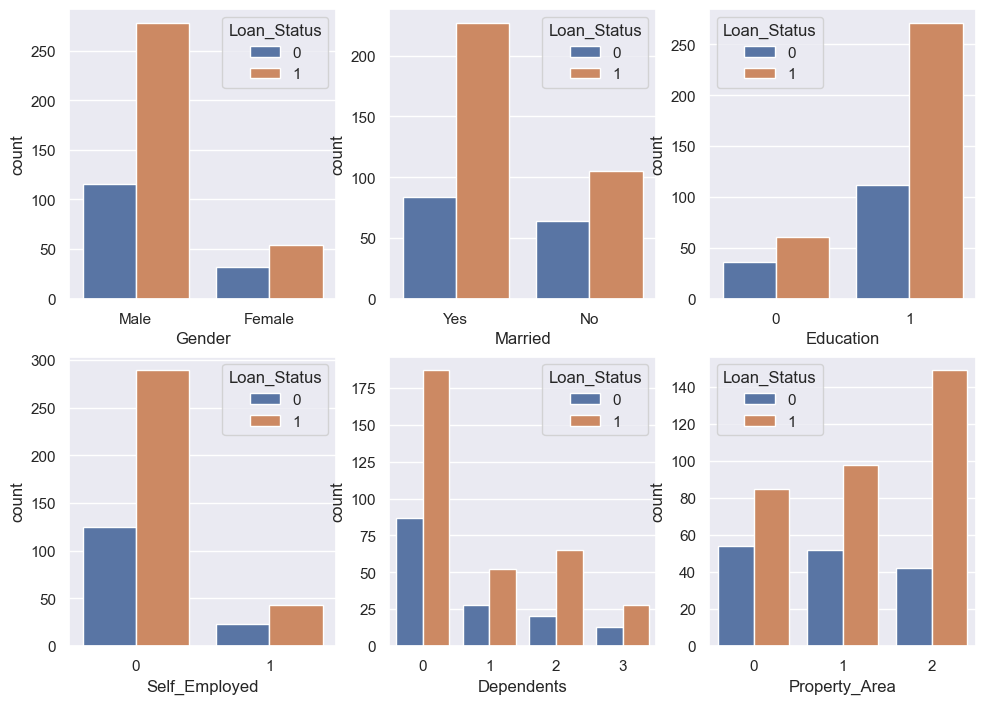

In [201]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.subplot(231)
sns.countplot(x="Gender", hue='Loan_Status', data=df)
plt.subplot(232)
sns.countplot(x="Married", hue='Loan_Status', data=df)
plt.subplot(233)
sns.countplot(x="Education", hue='Loan_Status', data=loan_eligibility)
plt.subplot(234)
sns.countplot(x="Self_Employed", hue='Loan_Status', data=loan_eligibility)
plt.subplot(235)
sns.countplot(x="Dependents", hue='Loan_Status', data=loan_eligibility)
plt.subplot(236)
sns.countplot(x="Property_Area", hue='Loan_Status', data=loan_eligibility)

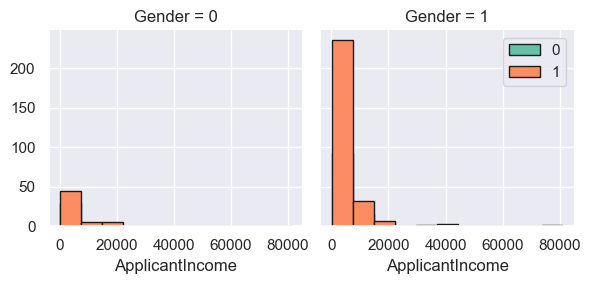

In [202]:
bins = np.linspace(loan_eligibility.ApplicantIncome.min(), loan_eligibility.ApplicantIncome.max(),12)
graph = sns.FacetGrid(loan_eligibility, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'ApplicantIncome', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

In [203]:
loan_eligibility

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,1
5,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.0,360.0,1.0,1,1
612,1,1,2,1,0,7583,0.0,187.0,360.0,1.0,1,1


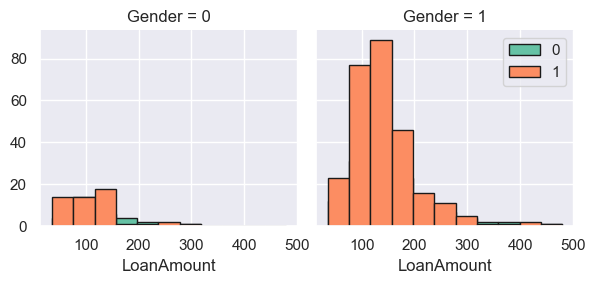

In [204]:
bins = np.linspace(loan_eligibility.Loan_Amount_Term.min(), loan_eligibility.Loan_Amount_Term.max(),12)
graph = sns.FacetGrid(loan_eligibility, col="Gender", hue="Loan_Status", palette="Set2", col_wrap=2)
graph.map(plt.hist, 'LoanAmount', bins=bins, ec="k")
graph.axes[-1].legend()
plt.show()

In [205]:
crosstb = pd.crosstab(loan_eligibility.Gender, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [206]:
crosstb

Loan_Status,0,1,All
Gender,,,
0,0.066667,0.112500,0.179167
1,0.241667,0.579167,0.820833
All,0.308333,0.691667,1.000000


In [207]:
crosstb = pd.crosstab(loan_eligibility.Gender, loan_eligibility.Loan_Status)

In [208]:
ChiSqResult = chi2_contingency(crosstb)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.1990183114281211


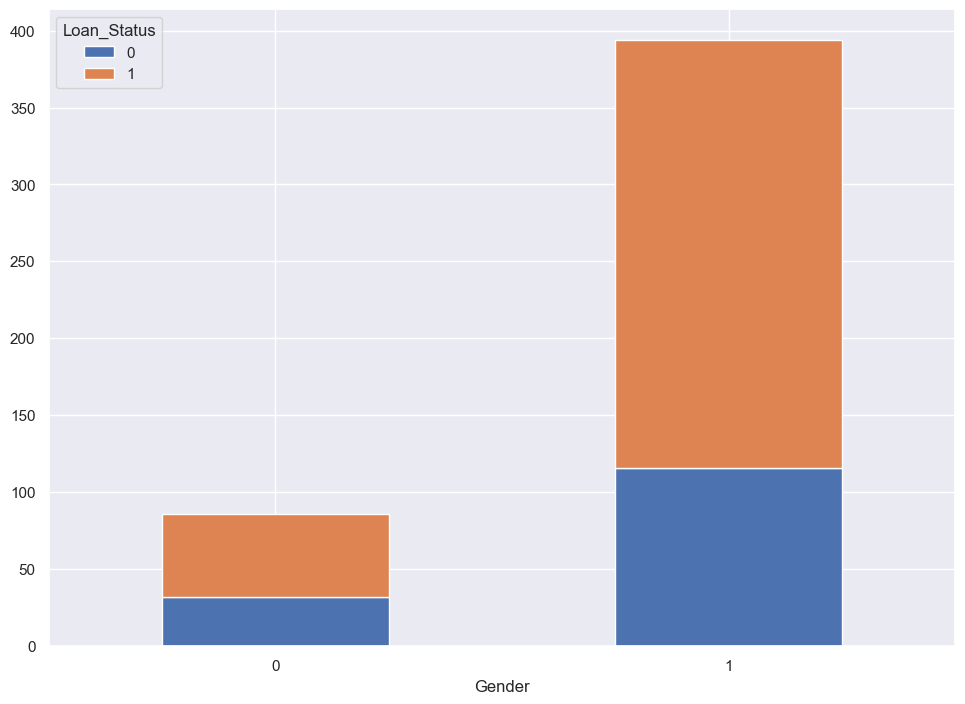

In [209]:
pl = crosstb.plot(kind="bar", stacked=True, rot=0)

In [210]:
crosstb = pd.crosstab(loan_eligibility.Education, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [211]:
crosstb

Loan_Status,0,1,All
Education,,,
0,0.075000,0.127083,0.202083
1,0.233333,0.564583,0.797917
All,0.308333,0.691667,1.000000


In [212]:
crosstb = pd.crosstab(loan_eligibility.Education, loan_eligibility.Loan_Status)

In [213]:
ChiSqResult = chi2_contingency(crosstb)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.16872400009733118


In [214]:
crosstb = pd.crosstab(loan_eligibility.Dependents, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [215]:
crosstb

Loan_Status,0,1,All
Dependents,,,
0,0.181250,0.389583,0.570833
1,0.058333,0.108333,0.166667
2,0.041667,0.135417,0.177083
3,0.027083,0.058333,0.085417
All,0.308333,0.691667,1.000000


In [216]:
crosstb = pd.crosstab(loan_eligibility.Dependents, loan_eligibility.Loan_Status)

In [217]:
ChiSqResult = chi2_contingency(crosstb)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.40720999848682704


In [218]:
crosstb = pd.crosstab(loan_eligibility.Married, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [219]:
crosstb

Loan_Status,0,1,All
Married,,,
0,0.133333,0.218750,0.352083
1,0.175000,0.472917,0.647917
All,0.308333,0.691667,1.000000


In [220]:
crosstb = pd.crosstab(loan_eligibility.Married, loan_eligibility.Loan_Status)

In [221]:
ChiSqResult = chi2_contingency(crosstb)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.018405456386355375


In [222]:
crosstb = pd.crosstab(loan_eligibility.Self_Employed, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [223]:
crosstb

Loan_Status,0,1,All
Self_Employed,,,
0,0.260417,0.602083,0.8625
1,0.047917,0.089583,0.1375
All,0.308333,0.691667,1.0000


In [224]:
crosstabulate = pd.crosstab(loan_eligibility.Self_Employed, loan_eligibility.Loan_Status)

In [225]:
ChiSqResult = chi2_contingency(crosstabulate)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.5371943232746994


In [226]:
crosstb = pd.crosstab(loan_eligibility.Property_Area, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [227]:
crosstb

Loan_Status,0,1,All
Property_Area,,,
0,0.112500,0.177083,0.289583
1,0.108333,0.204167,0.312500
2,0.087500,0.310417,0.397917
All,0.308333,0.691667,1.000000


In [228]:
crosstabresult = pd.crosstab(loan_eligibility.Property_Area, loan_eligibility.Loan_Status)

In [229]:
ChiSqResult = chi2_contingency(crosstabresult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0022139594148752133


In [230]:
crosstb = pd.crosstab(loan_eligibility.Credit_History, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [231]:
crosstb

Loan_Status,0,1,All
Credit_History,,,
0.0,0.131250,0.014583,0.145833
1.0,0.177083,0.677083,0.854167
All,0.308333,0.691667,1.000000


In [232]:
CrosstabResult = pd.crosstab(loan_eligibility.Credit_History, loan_eligibility.Loan_Status)

In [233]:
print(CrosstabResult)

Loan_Status      0    1
Credit_History         
0.0             63    7
1.0             85  325


In [234]:
ChiSqResult = chi2_contingency(CrosstabResult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 2.135981766869101e-30


In [235]:
crosstb = pd.crosstab(loan_eligibility.Loan_Amount_Term, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [236]:
crosstb

Loan_Status,0,1,All
Loan_Amount_Term,,,
36.0,0.004167,0.000000,0.004167
60.0,0.000000,0.004167,0.004167
84.0,0.002083,0.004167,0.006250
120.0,0.000000,0.006250,0.006250
180.0,0.025000,0.050000,0.075000
240.0,0.002083,0.002083,0.004167
300.0,0.010417,0.008333,0.018750
360.0,0.247917,0.608333,0.856250
480.0,0.016667,0.008333,0.025000


In [237]:
CrosstabResult = pd.crosstab(loan_eligibility.Loan_Amount_Term, loan_eligibility.Loan_Status)

In [238]:
ChiSqResult = chi2_contingency(crosstabresult)
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.0022139594148752133


In [239]:
n=3
k = random.randint(0, 1) # decide on k once
for _ in range(n):
    print(k) # pr

0
0
0


In [240]:
print(random.randint(0, 1))

0


In [241]:
simulation_data = pd.DataFrame(columns=['Credit_History', 'Loan_Status'])

In [242]:
print(simulation_data)

Empty DataFrame
Columns: [Credit_History, Loan_Status]
Index: []


In [243]:
#data["Type"][i-1] == "Fire":
#        Type_new[i]="Orange"
#        random.randint(0, 1)

In [244]:
for x in range(10):
    print(x)
    x = x + 1
print(simulation_data)

0
1
2
3
4
5
6
7
8
9
Empty DataFrame
Columns: [Credit_History, Loan_Status]
Index: []


In [245]:
#for x in range(10):
    #print(random.randint(0, 1))
#    simulation_data["Loan_Status"][x] == "apple"
#    x = x + 1
#print(simulation_data)

In [246]:
crosstb = pd.crosstab(loan_eligibility.Gender, loan_eligibility.Loan_Status, normalize=True, margins=True)

In [247]:
crosstb

Loan_Status,0,1,All
Gender,,,
0,0.066667,0.112500,0.179167
1,0.241667,0.579167,0.820833
All,0.308333,0.691667,1.000000


## Chisquare Test Results

| Variable       |  P-value Result        |  Significant Relationship  |
|:---------------|:-----------------------|:---------------------------|
| Gender         |  0.199                 | No                         |
| Education      |  0.002                 | Yes                        |
| Property Area  |  0.022                 | Yes                        |     
| Married        |  0.018                 | Yes                        |
| Credit History |  2.135981766869101e-30 | Yes                        |   
| Dependents     |  0.4                   | No                         |            
| Self Employed  |  0.537                 | No                         |

If need to compare the P-value with the alpha value. We will use an alpha value of 0.05.
So, if P-value > 0.05 the variables do not have a significant relationship whereas if the P-value < 0.05 there is a significant relationship. We can see from the table that Education, Property Area, Married and Credit History have a strong relationship with Loan Status. 


## Simulating the Loan Legibility Dataset

In [407]:
#bank = pd.DataFrame(columns=['Gender','Married','Self_Employed','Property_Area','Credit_History', 'Loan_Status'])
#for x in range(25):
#    new_row = {'Gender':random.randint(0, 1), 'Married':random.randint(0, 1),'Self_Employed':random.randint(0, 1), 'Property_Area':random.randint(0, 1),'Credit_History':random.randint(0, 1), 'Loan_Status':random.randint(0, 1)}
#    bank = bank.append(new_row, ignore_index=True)
#    x = x + 1

#new_data = pd.DataFrame(columns=['Credit_History', 'Loan_Status'])
#new_row = {'Credit_History':1.0, 'Loan_Status':1}
#append row to the dataframe
#new_data = new_data.append(new_row, ignore_index=True)
#choices = [2, 4] 
#weights = [0.75, 0.25] 
#rnd = np.random.choice(choices, p=weights) 
gender = "NY"
term = [36, 60, 84, 120, 180, 240, 300, 360, 480]
property = ['rural', 'urban', 'semiurban']
dependents = [0, 1, 2, 3]

bank = pd.DataFrame(columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Credit_History', 'Loan_Status', 'LoanAmountTerm'])
for x in range(480):
    #new_row = {'Gender':random.randint(0, 1), 'Married':random.randint(0, 1),'Self_Employed':random.randint(0, 1), 'Property_Area':random.randint(0, 1),'Credit_History':random.randint(0, 1), 'Loan_Status':random.randint(0, 1)}
    a = random.choices("MF", cum_weights=(0.82,1.00), k=1)
    b = random.choices("YN", cum_weights=(0.70,1.00), k=1)
    c = random.choices("YN", cum_weights=(0.9,1.00), k=1)
    area = random.choices(property, weights=(28, 31, 39), k=1)
    dependent = random.choices(dependents, weights=(57, 16, 17, 8), k=1)
    education = random.choices("YN", cum_weights=(0.80,1.00), k=1)
    credit = random.choices("YN", cum_weights=(0.9,1.00), k=1)
    
    e = random.choices("012", cum_weights=(0.9,0.3,1.00), k=1)
    termAmount = random.choices(term, weights=(0.4, 0.4, 0.6, 0.6, 7.5, 0.4, 1.8, 85, 2.5), k=1)
    new_row = {'Gender':a[0],'Married':random.randint(0, 1),'Dependents':dependent[0],'Education':education[0],'Self_Employed':c[0], 'Property_Area':area[0],'Credit_History':credit[0], 'Loan_Status':b[0], 'LoanAmountTerm':termAmount[0]}
    #random.choices(["white", "green", "red"], [12, 12, 4], k=10)
    bank = bank.append(new_row, ignore_index=True)
    
    x = x + 1


C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_inde

C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_inde

C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_inde

C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_inde

C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_inde

C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_inde

C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_inde

C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_inde

C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_inde

C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_inde

C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_index=True)
C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\3195873750.py:34: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bank = bank.append(new_row, ignore_inde

In [408]:
print(bank)

    Gender Married Dependents Education Self_Employed Property_Area  \
0        M       0          0         Y             Y         urban   
1        M       0          0         Y             Y     semiurban   
2        M       0          0         Y             Y     semiurban   
3        M       1          0         N             Y         urban   
4        M       0          2         N             Y         rural   
..     ...     ...        ...       ...           ...           ...   
475      M       1          2         N             Y     semiurban   
476      M       0          1         Y             N     semiurban   
477      M       1          1         Y             Y     semiurban   
478      M       1          0         Y             Y         rural   
479      M       1          0         N             Y         urban   

    Credit_History Loan_Status LoanAmountTerm  
0                Y           N            360  
1                Y           Y            360  
2  

In [409]:
crosstb = pd.crosstab(bank.Gender, bank.Loan_Status, normalize=True, margins=True)

In [410]:
crosstb

Loan_Status,N,Y,All
Gender,,,
F,0.054167,0.095833,0.15
M,0.245833,0.604167,0.85
All,0.300000,0.700000,1.00


In [411]:
crosstb = pd.crosstab(loan_eligibility.Loan_Status, loan_eligibility.Gender, normalize=False, margins=True)

In [412]:
crosstb

Gender,0,1,All
Loan_Status,,,
0,32,116,148
1,54,278,332
All,86,394,480


In [413]:
crosstb = pd.crosstab(bank.Self_Employed, bank.Loan_Status, normalize=True, margins=True)

In [414]:
crosstb

Loan_Status,N,Y,All
Self_Employed,,,
N,0.025,0.060417,0.085417
Y,0.275,0.639583,0.914583
All,0.300,0.700000,1.000000


In [415]:
crosstb = pd.crosstab(bank.LoanAmountTerm, bank.Loan_Status, normalize=False, margins=True)

In [416]:
crosstb

Loan_Status,N,Y,All
LoanAmountTerm,,,
60,1,0,1
84,2,2,4
120,2,2,4
180,8,27,35
240,0,3,3
300,0,2,2
360,129,293,422
480,2,7,9
All,144,336,480


In [417]:
crosstab = pd.crosstab(bank.Property_Area, bank.Loan_Status, normalize=False, margins=True)

In [418]:
crosstab

Loan_Status,N,Y,All
Property_Area,,,
rural,37,103,140
semiurban,60,123,183
urban,47,110,157
All,144,336,480


In [419]:
print(bank["Gender"].value_counts())

M    408
F     72
Name: Gender, dtype: int64


In [420]:
crosstab = pd.crosstab(bank.Married, bank.Loan_Status, normalize=True, margins=True)

In [421]:
crosstab

Loan_Status,N,Y,All
Married,,,
0,0.141667,0.364583,0.50625
1,0.158333,0.335417,0.49375
All,0.300000,0.700000,1.00000


In [422]:
crosstab = pd.crosstab(bank.Credit_History, bank.Loan_Status)

In [423]:
crosstab

Loan_Status,N,Y
Credit_History,,
N,14,35
Y,130,301


In [424]:
z = pd.crosstab(bank.Credit_History, bank.Loan_Status, normalize=True, margins=True)

In [425]:
z

Loan_Status,N,Y,All
Credit_History,,,
N,0.029167,0.072917,0.102083
Y,0.270833,0.627083,0.897917
All,0.300000,0.700000,1.000000


In [426]:
ChiSqResult = chi2_contingency(crosstab)

In [427]:
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

The P-Value of the ChiSq Test is: 0.9475396619061704


In [335]:
crosstab = pd.crosstab(bank.Dependents, bank.Loan_Status, normalize=True, margins=True)

In [336]:
crosstab

Loan_Status,N,Y,All
Dependents,,,
0,0.181250,0.397917,0.579167
1,0.052083,0.118750,0.170833
2,0.060417,0.112500,0.172917
3,0.025000,0.052083,0.077083
All,0.318750,0.681250,1.000000


In [337]:
crosstab = pd.crosstab(bank.Property_Area, bank.Loan_Status, normalize=True, margins=True)

In [338]:
crosstab

Loan_Status,N,Y,All
Property_Area,,,
rural,0.104167,0.218750,0.322917
semiurban,0.127083,0.258333,0.385417
urban,0.087500,0.204167,0.291667
All,0.318750,0.681250,1.000000


In [339]:
bank

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Credit_History,Loan_Status,LoanAmountTerm
0,M,0,0,Y,Y,urban,N,Y,360
1,F,1,2,N,Y,rural,N,Y,360
2,F,0,0,Y,Y,semiurban,Y,Y,360
3,M,1,0,Y,Y,rural,Y,Y,360
4,M,0,0,Y,Y,rural,Y,N,360
...,...,...,...,...,...,...,...,...,...
475,M,1,0,Y,Y,urban,N,N,360
476,F,0,3,Y,Y,urban,Y,Y,360
477,M,1,2,N,Y,rural,N,N,360
478,M,1,0,Y,N,semiurban,Y,N,360


In [340]:
new_data = pd.DataFrame(columns=['Credit_History', 'Loan_Status'])
new_row = {'Credit_History':1.0, 'Loan_Status':1}
#append row to the dataframe
new_data = new_data.append(new_row, ignore_index=True)

C:\Users\Teacher\AppData\Local\Temp\ipykernel_12480\1672992680.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_data = new_data.append(new_row, ignore_index=True)


In [341]:
crosstab = pd.crosstab(bank.Education, bank.Loan_Status, normalize=True, margins=True)

In [342]:
crosstab

Loan_Status,N,Y,All
Education,,,
N,0.05000,0.110417,0.160417
Y,0.26875,0.570833,0.839583
All,0.31875,0.681250,1.000000


In [343]:
data = pd.DataFrame(columns=['Credit_History', 'Loan_Status'])

In [288]:
#mean = np.mean(data)
#    std = np.std(data)
#    shape = (mean/std)**2
#    scale = (std**2)/mean
mean = 5364.23  
std = 5668.25


scale = (std**2)/mean
shape = (mean/std)**2
print(scale)
print(shape)

5989.500461855663
0.8956055741480078


In [261]:
#random.Generator.gamma(shape, scale=1.0, size=None)

random.Generator.gamma(5, scale=0.57, size=100)


AttributeError: module 'random' has no attribute 'Generator'

In [311]:
shape, scale = 0.895605, 5989.5004  # mean=4, std=2*sqrt(2)
s = np.random.default_rng().gamma(shape, scale, 480)

In [312]:
print(s)

[2.39623499e+03 9.93572690e+03 3.71001461e+03 4.14983752e+03
 4.31465157e+03 2.03080325e+03 1.80310443e+04 8.50672548e+03
 3.79048417e+02 5.91203567e+03 2.78336550e+03 3.04065613e+03
 7.51706588e+03 3.79864228e+03 8.89751092e+02 7.78769253e+03
 1.49154752e+03 2.71159146e+03 9.66178142e+02 3.25642052e+03
 8.13400386e+03 2.63607072e+02 1.27100573e+04 2.73837989e+02
 9.34590951e+02 3.65415033e+03 1.26616632e+03 2.40238391e+03
 2.83671393e+03 1.07859513e+02 8.18031742e+02 2.20806237e+04
 3.61395380e+03 1.23862159e+04 3.25209914e+03 1.99958989e+03
 2.21253785e+03 4.73005367e+03 3.19726639e+03 7.11520057e+03
 4.11709771e+02 1.71897424e+02 2.16433477e+03 5.46334877e+03
 4.21990996e+03 1.63307502e+04 5.97576952e+03 6.62682927e+02
 7.00378805e+03 1.38034212e+02 4.33363429e+03 8.64431204e+03
 1.15550424e+03 6.62471944e+03 2.62264805e+04 1.78130790e+03
 3.72873158e+01 1.27925397e+04 5.08009619e+02 7.91015027e+02
 1.92601725e+04 5.66939594e+02 6.28264835e+03 1.22333332e+04
 1.06051025e+04 8.381207

In [313]:
df = pd.DataFrame(s)

print(df.describe())

                  0
count    480.000000
mean    5248.238481
std     5541.264418
min       17.304637
25%     1358.766674
50%     3246.396747
75%     7429.694435
max    32816.315014


In [314]:
x = loan_eligibility["ApplicantIncome"]
print(x.describe())

count      480.000000
mean      5364.231250
std       5668.251251
min        150.000000
25%       2898.750000
50%       3859.000000
75%       5852.500000
max      81000.000000
Name: ApplicantIncome, dtype: float64


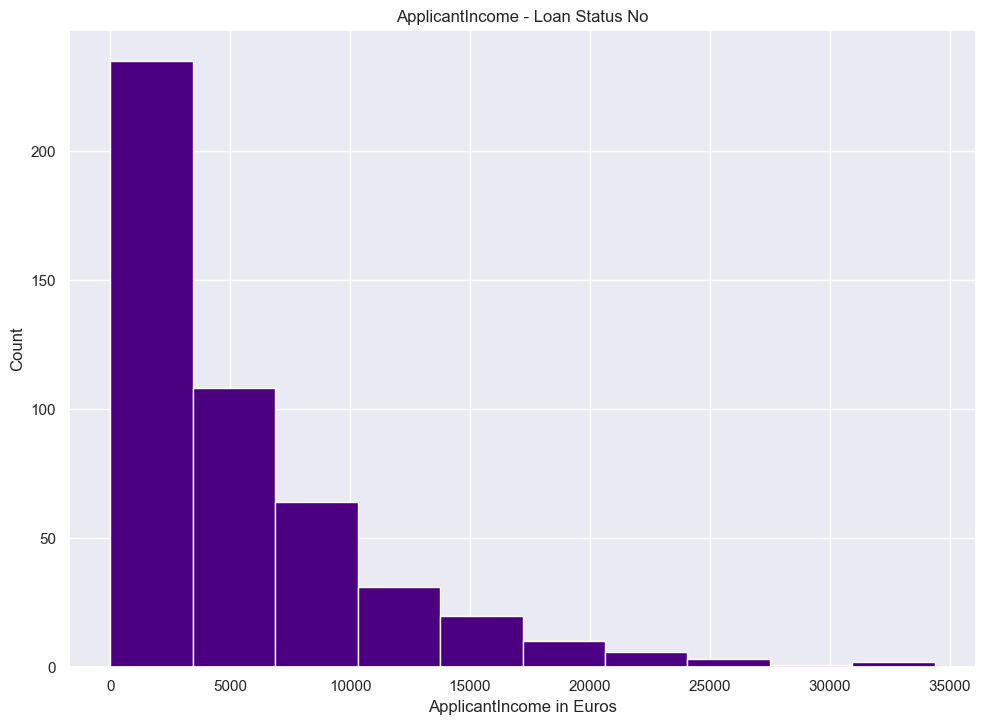

In [303]:
#Status_Yes_ApplicantIncome = Loan_No["ApplicantIncome"]
  
plt.hist(s, bins = 10, color = "indigo")
plt.title("ApplicantIncome - Loan Status No")
plt.xlabel("ApplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

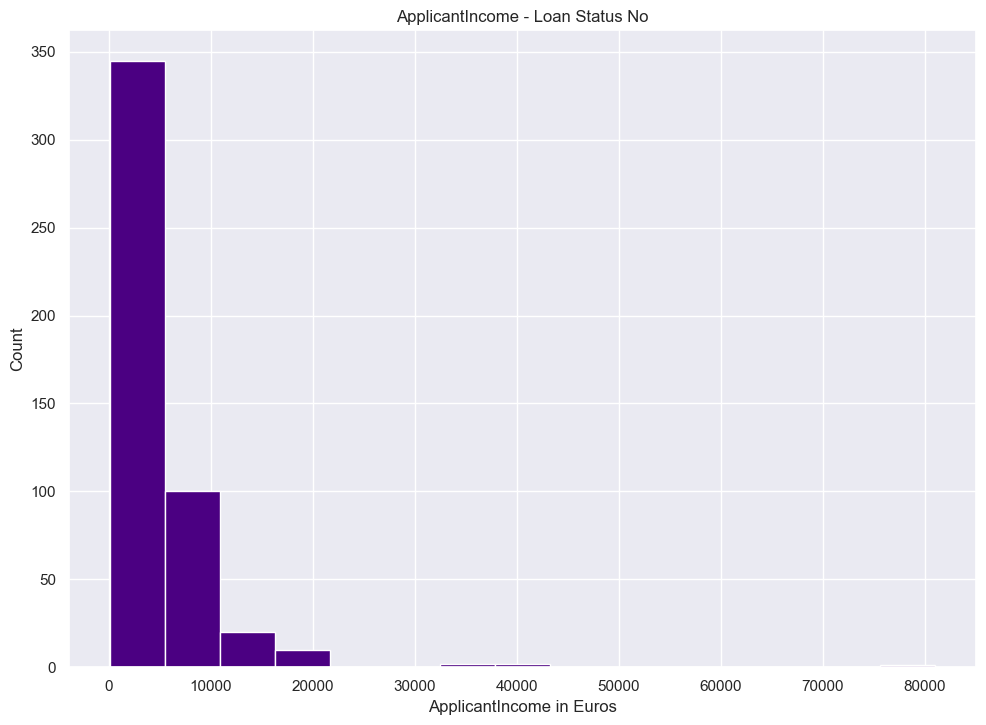

In [302]:
plt.hist(loan_eligibility["ApplicantIncome"], bins = 15, color = "indigo")
plt.title("ApplicantIncome - Loan Status No")
plt.xlabel("ApplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

In [ ]:
#data = pd.DataFrame()

In [317]:
y = loan_eligibility["CoapplicantIncome"]
print(y.describe())

count      480.000000
mean      1581.093583
std       2617.692267
min          0.000000
25%          0.000000
50%       1084.500000
75%       2253.250000
max      33837.000000
Name: CoapplicantIncome, dtype: float64


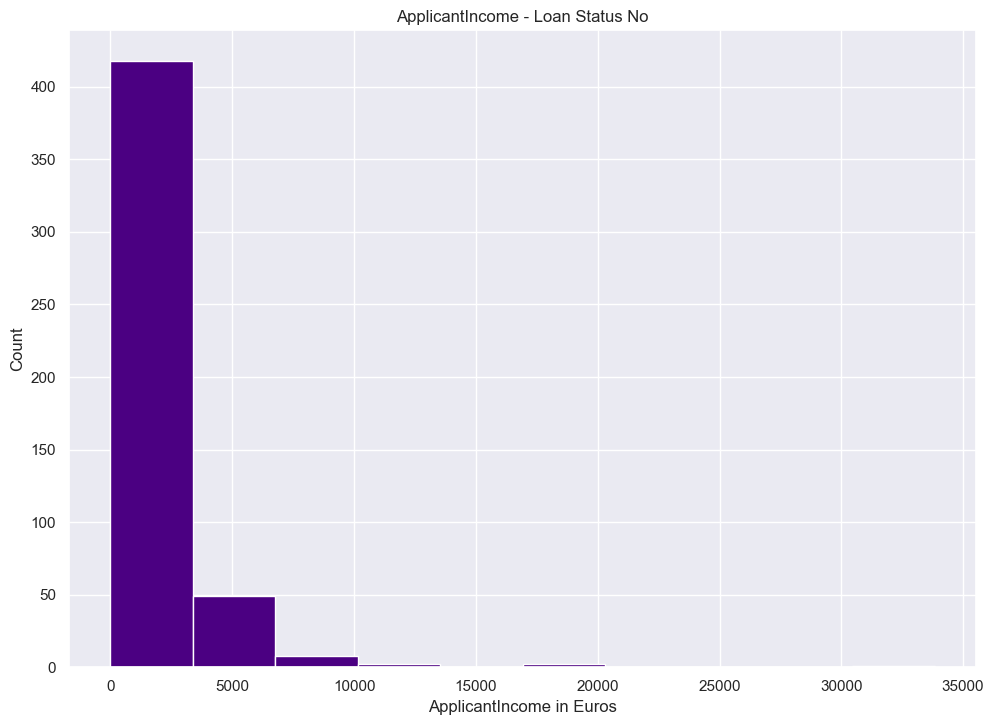

In [322]:
plt.hist(y, bins = 10, color = "indigo")
plt.title("ApplicantIncome - Loan Status No")
plt.xlabel("ApplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

In [318]:
m = 1581.093583  
stand = 2617.692267


scale = (stand**2)/m
shape = (m/stand)**2
print(scal)
print(shap)

4333.907162983912
0.3648194397203956


In [323]:
shap, scal = 0.3648, 4333.9071  # mean=4, std=2*sqrt(2)
g = np.random.default_rng().gamma(shap, scal, 480)

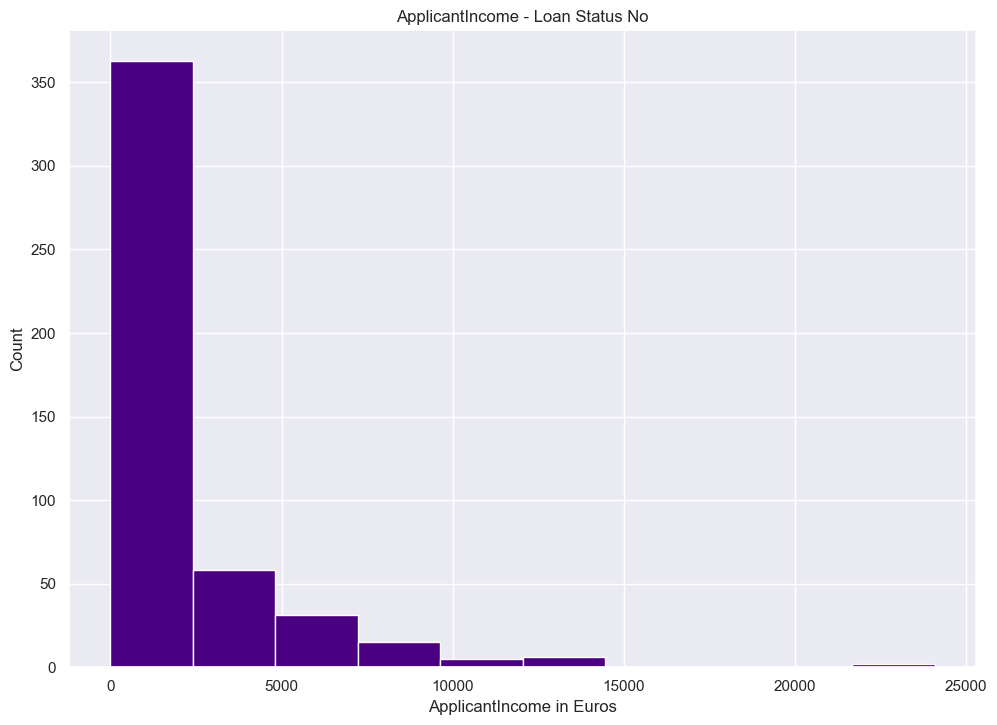

In [324]:
plt.hist(g, bins = 10, color = "indigo")
plt.title("ApplicantIncome - Loan Status No")
plt.xlabel("ApplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

In [325]:
l = loan_eligibility["LoanAmount"]
print(l.describe())

count    480.000000
mean     144.735417
std       80.508164
min        9.000000
25%      100.000000
50%      128.000000
75%      170.000000
max      600.000000
Name: LoanAmount, dtype: float64


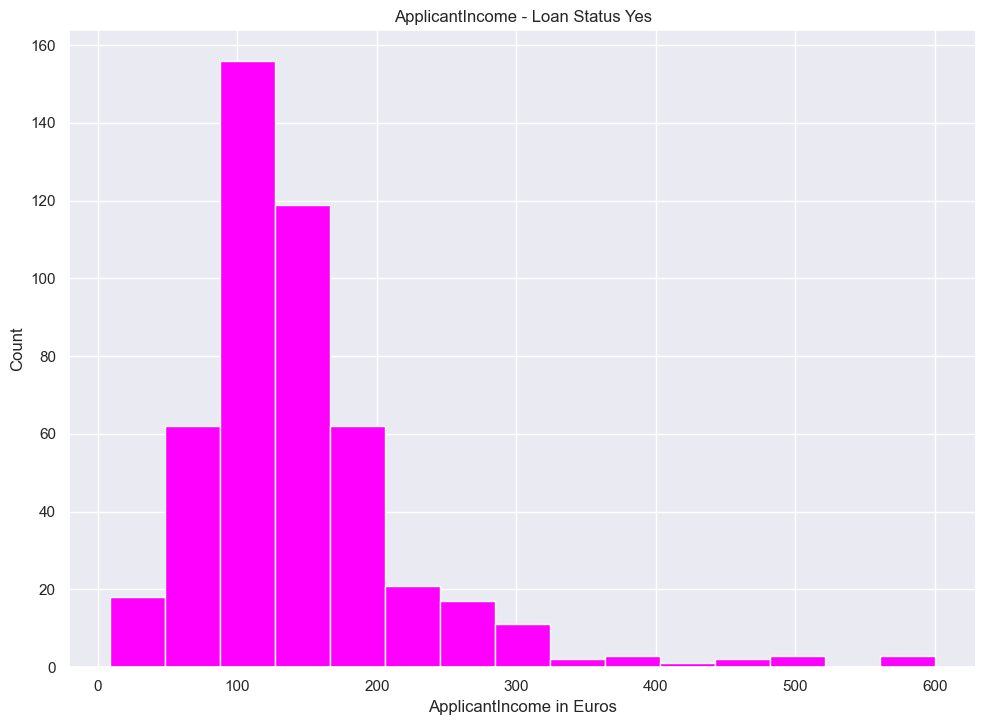

In [326]:
plt.hist(l, bins = 15, color = "magenta")
plt.title("ApplicantIncome - Loan Status Yes")
plt.xlabel("ApplicantIncome in Euros")
plt.ylabel("Count")
plt.show()

In [ ]:
print(data)

In [ ]:
data['Loan_Status']

In [ ]:
letters = ["N", "Y"]
for i in range(10):
    i = i + 1
    data.append({'Loan_Status' : 'random.choice(letters)})
    

In [ ]:
letters = ["N", "Y"]
for i in range(10):
    i = i + 1
    print(random.choice(letters))
    data.append()

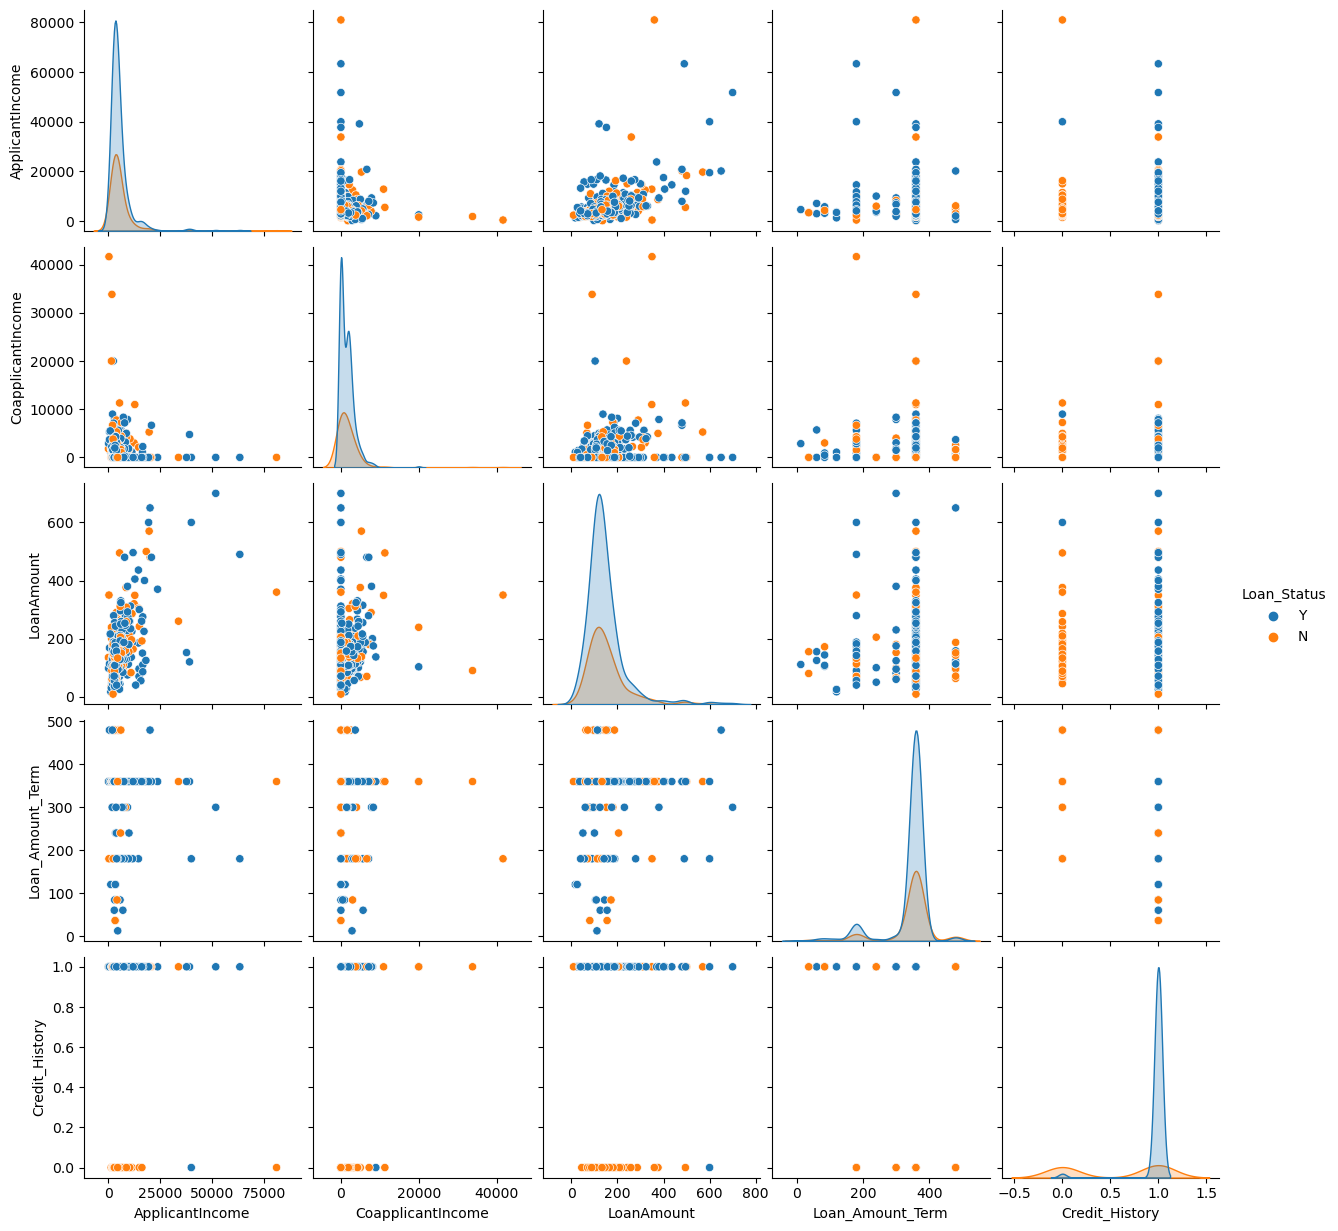

In [15]:
sns.pairplot(loan_eligibility, hue='Loan_Status')